In [4]:
from itertools import product
import operator        
import datetime
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import pandas_profiling as pdf

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, lars_path, ElasticNet, ElasticNetCV, Ridge, RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# pointer to scaler I want to use
use_transform = RobustScaler

def mytransform():
    return QuantileTransformer(output_distribution='normal')

import scipy.stats as stats
from scipy.stats import skew  
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#!conda install -y -conda-forge  xgboost 
from xgboost import XGBRegressor
from xgboost import plot_importance

#!conda install -y -c conda-forge lightgbm
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#!conda install -y -c districtdatalabs yellowbrick
from yellowbrick.features import JointPlotVisualizer, ParallelCoordinates
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

#!conda install -y -c conda-forge mlxtend
from mlxtend.regressor import StackingCVRegressor

import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import ipywidgets as widgets
from IPython.display import clear_output
pd.options.display.max_columns=None
#pd.options.display.max_rows=None

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

print(datetime.datetime.now())



/home/ubuntu/anaconda2/envs/tensorflow/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda2/envs/tensorflow/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda2/envs/tensorflow/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda2/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu

2019-05-22 19:32:09.063562


### 1. Import

In [5]:
# import train data
datadir = "./data/"
datafile = datadir + "train.csv"
df_raw = pd.read_csv(datafile)
print(df_raw.shape)
display(df_raw.head())

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

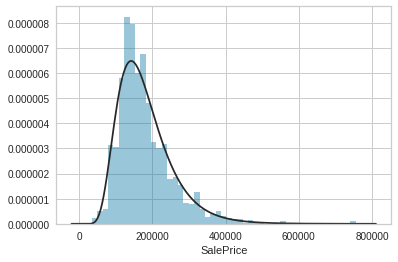

In [6]:
# plot
sns.distplot(df_raw['SalePrice'], kde=False, fit=stats.lognorm)


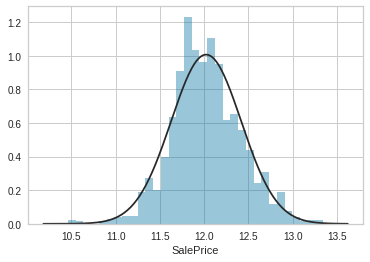

In [7]:
sns.distplot(np.log1p(df_raw.loc[df_raw['GrLivArea']<4000]['SalePrice']), kde=False, fit=stats.norm)


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512989))

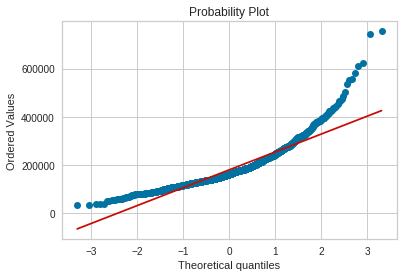

In [8]:
from scipy import stats
stats.probplot(df_raw['SalePrice'], plot=plt)

In [9]:
# import test data
datafile = datadir + "test.csv"
df_test = pd.read_csv(datafile)
df_test['SalePrice']=np.nan
df_test.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [10]:
# concatenate train and test for feature engineering across both
df_raw=pd.concat((df_raw, df_test)).set_index('Id')
print(df_raw.shape)

(2919, 80)


### 2. Scrub

In [11]:
df_raw.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Per docs
23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables 

nominal (categorical)
- MS SubClass
- MS Zoning
- Street
- Alley
- Land Contour
- Lot Config
- Neighborhood
- Condition 1
- Condition 2
- Bldg Type
- House Style
- Roof Style 
- Roof Matl
- Exterior 1
- Exterior 2
- Mas Vnr Type
- Foundation
- Heating
- Central Air
- Garage Type
- Misc Feature
- Sale Type
- Sale Condition

ordinal (categorical but map to quality, like Po/Fa/TA/Gd/Ex)
- Lot Shape
- Utilities
- Land Slope
- Overall Qual
- Overall Cond
- Exter Qual
- Exter Cond
- Bsmt Qual
- Bsmt Cond
- Bsmt Exposure
- BsmtFin Type 1
- BsmtFinType 2
- HeatingQC
- Electrical
- KitchenQual
- Functional
- FireplaceQu
- Garage Finish 
- Garage Qual
- Garage Cond
- Paved Drive
- Pool QC
- Fence

discrete (int)
- Year Built
- Year Remod/Add
- Bsmt Full Bath
- Bsmt Half Bath
- Full Bath
- Half Bath
- Bedroom
- Kitchen
- TotRmsAbvGrd
- Fireplaces
- Garage Yr Blt 
- Garage Cars
- Mo Sold
- Yr Sold

continuous (float)
- Lot Frontage
- Lot Area
- Mas Vnr Area
- BsmtFin SF 1
- BsmtFin SF 2
- Bsmt Unf SF
- Total Bsmt SF
- 1st Flr SF
- 2nd Flr SF
- Low Qual Fin SF
- Gr Liv Area
- Garage Area
- Wood Deck SF
- Open Porch SF
- Enclosed Porch
- 3-Ssn Porch
- Screen Porch
- Pool Area
- Misc Val

- SalePrice


In [12]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 
               'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
               'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
               'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 
               'SaleType', 'SaleCondition']

ordinal = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 
           'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
           'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 
           'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
           'PavedDrive', 'PoolQC', 'Fence',]

numerical = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 
             'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
             'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold', 
             
             'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',  'BsmtFinSF2', 
             'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
             'GrLivArea', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

print(df_raw.shape)
print(len(categorical))
print(len(ordinal))
print(len(numerical))
df_raw = df_raw[categorical + ordinal + numerical]
print(df_raw.shape)

(2919, 80)
23
23
34
(2919, 80)


In [13]:
df_raw.head()

MSSubClass MSZoning Street Alley LandContour LotConfig Neighborhood  \
Id                                                                        
1           60       RL   Pave   NaN         Lvl    Inside      CollgCr   
2           20       RL   Pave   NaN         Lvl       FR2      Veenker   
3           60       RL   Pave   NaN         Lvl    Inside      CollgCr   
4           70       RL   Pave   NaN         Lvl    Corner      Crawfor   
5           60       RL   Pave   NaN         Lvl       FR2      NoRidge   

   Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
Id                                                                            
1        Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
2       Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd   
3        Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
4        Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng   
5        Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   

   Exterior2nd MasVnrType Foundation Heating CentralAir GarageType  \
Id                                                                   
1      VinylSd    BrkFace      PConc    GasA          Y     Attchd   
2      MetalSd       None     CBlock    GasA          Y     Attchd   
3      VinylSd    BrkFace      PConc    GasA          Y     Attchd   
4      Wd Shng       None     BrkTil    GasA          Y     Detchd   
5      VinylSd    BrkFace      PConc    GasA          Y     Attchd   

   MiscFeature SaleType SaleCondition LotShape Utilities LandSlope  \
Id                                                                   
1          NaN       WD        Normal      Reg    AllPub       Gtl   
2          NaN       WD        Normal      Reg    AllPub       Gtl   
3          NaN       WD        Normal      IR1    AllPub       Gtl   
4          NaN       WD       Abnorml      IR1    AllPub       Gtl   
5          NaN       WD        Normal      IR1    AllPub       Gtl   

    OverallQual  OverallCond ExterQual ExterCond BsmtQual BsmtCond  \
Id                                                                   
1             7            5        Gd        TA       Gd       TA   
2             6            8        TA        TA       Gd       TA   
3             7            5        Gd        TA       Gd       TA   
4             7            5        TA        TA       TA       Gd   
5             8            5        Gd        TA       Gd       TA   

   BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC Electrical KitchenQual  \
Id                                                                           
1            No          GLQ          Unf        Ex      SBrkr          Gd   
2            Gd          ALQ          Unf        Ex      SBrkr          TA   
3            Mn          GLQ          Unf        Ex      SBrkr          Gd   
4            No          ALQ          Unf        Gd      SBrkr          Gd   
5            Av          GLQ          Unf        Ex      SBrkr          Gd   

   Functional FireplaceQu GarageFinish GarageQual GarageCond PavedDrive  \
Id                                                                        
1         Typ         NaN          RFn         TA         TA          Y   
2         Typ          TA          RFn         TA         TA          Y   
3         Typ          TA          RFn         TA         TA          Y   
4         Typ          Gd          Unf         TA         TA          Y   
5         Typ          TA          RFn         TA         TA          Y   

   PoolQC Fence  YearBuilt  YearRemodAdd  BsmtFullBath  BsmtHalfBath  \
Id                                                                     
1     NaN   NaN       2003          2003           1.0           0.0   
2     NaN   NaN       1976          1976           0.0           1.0   
3     NaN   NaN       2001          2002           1.0           0.0   
4     NaN   NaN   

In [14]:
# drop columns with lots of missing data
df_raw.drop(columns=['PoolQC','MiscFeature','Alley'], inplace=True)
# no variation:
df_raw.drop(columns=['Utilities'], inplace=True)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
Street           2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non-null object
Foundation       2919 non-null object
Heating          2919 non-null object
CentralAir       2919 non-null object
GarageType       2762 non-null object
SaleType         2918 non-null object
SaleCondition    2919 non-null object
LotShape         2919 non-null object
LandSlope        2919 non-null object
OverallQual      291

In [15]:
# remove sf > 4000 per http://jse.amstat.org/v19n3/decock.pdf
df= df_raw.loc[~((df_raw['GrLivArea'] > 4000) & (~df_raw['SalePrice'].isna()))]


#### Map all categorical to int

In [16]:
# map all the columns listed as ordinal to int
# per http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

# map these 9 quality labels to int

qdict = {
    'Po' : '0',
    'Fa' : '1',
    'TA' : '2',
    'Gd' : '3',
    'Ex' : '4',
    np.nan : '2'
}

qcols = ['ExterQual',
         'ExterCond',
         'BsmtQual',
         'BsmtCond',
         'HeatingQC',
         'KitchenQual',
         'GarageQual',
         'GarageCond',
         'FireplaceQu'         
        ]

# these values are very rare (<=5), roll poor->fair, excellent->good
df.loc[df['ExterCond']=='Po', 'ExterCond'] = 'Fa'
df.loc[df['BsmtCond']=='Po', 'BsmtCond'] = 'Fa'
df.loc[df['HeatingQC']=='Po', 'HeatingQC'] = 'Fa'
df.loc[df['GarageQual']=='Po', 'GarageQual'] = 'Fa'
df.loc[df['GarageQual']=='Ex', 'GarageQual'] = 'Gd'
df.loc[df['GarageCond']=='Ex', 'GarageCond'] = 'Gd'

for col in qcols:
    print(col)
    print(df[col].value_counts())
    df.loc[:, col] = df[col].apply(lambda q: qdict[q])
    df.loc[:, col] = df[col].astype(int)
    print(df[col].value_counts())

ExterQual
TA    1798
Gd     978
Ex     104
Fa      35
Name: ExterQual, dtype: int64
2    1798
3     978
4     104
1      35
Name: ExterQual, dtype: int64
ExterCond
TA    2534
Gd     299
Fa      70
Ex      12
Name: ExterCond, dtype: int64
2    2534
3     299
1      70
4      12
Name: ExterCond, dtype: int64
BsmtQual
TA    1283
Gd    1209
Ex     254
Fa      88
Name: BsmtQual, dtype: int64
2    1364
3    1209
4     254
1      88
Name: BsmtQual, dtype: int64
BsmtCond
TA    2602
Gd     122
Fa     109
Name: BsmtCond, dtype: int64
2    2684
3     122
1     109
Name: BsmtCond, dtype: int64
HeatingQC
Ex    1489
TA     857
Gd     474
Fa      95
Name: HeatingQC, dtype: int64
4    1489
2     857
3     474
1      95
Name: HeatingQC, dtype: int64
KitchenQual
TA    1492
Gd    1151
Ex     201
Fa      70
Name: KitchenQual, dtype: int64
2    1493
3    1151
4     201
1      70
Name: KitchenQual, dtype: int64
GarageQual
TA    2600
Fa     129
Gd      27
Name: GarageQual, dtype: int64
2    2759
1     129
3 

In [17]:
print(df['LandSlope'].value_counts())

slope_dict = {
    'Gtl': 0,
    'Mod' : 1,
    'Sev' : 2,
}

df['LandSlope'] = df['LandSlope'].apply(lambda q: slope_dict[q])

print(df['LandSlope'].value_counts())

Gtl    2774
Mod     125
Sev      16
Name: LandSlope, dtype: int64
0    2774
1     125
2      16
Name: LandSlope, dtype: int64


In [18]:
print(df['GarageFinish'].value_counts())

garagefinish_dict = {
    np.nan : 0,
    'Unf': 1,
    'RFn' : 2,
    'Fin' : 3,
}
df['GarageFinish'] = df['GarageFinish'].apply(lambda q: garagefinish_dict[q])

print(df['GarageFinish'].value_counts())

Unf    1230
RFn     811
Fin     715
Name: GarageFinish, dtype: int64
1    1230
2     811
3     715
0     159
Name: GarageFinish, dtype: int64


In [19]:
#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement

print(df['BsmtExposure'].value_counts())

BsmtExposure_dict = {
    np.nan : 0,
    'No' : 1,
    'Mn' : 2, 
    'Av' : 3, 
    'Gd' : 4
}
df['BsmtExposure'] = df['BsmtExposure'].apply(lambda q: BsmtExposure_dict[q])

print(df['BsmtExposure'].value_counts())


No    1904
Av     417
Gd     273
Mn     239
Name: BsmtExposure, dtype: int64
1    1904
3     417
4     273
2     239
0      82
Name: BsmtExposure, dtype: int64


In [20]:
#        Typ	Typical Functionality
#        Min1	Minor Deductions 1
#        Min2	Minor Deductions 2
#        Mod	Moderate Deductions
#        Maj1	Major Deductions 1
#        Maj2	Major Deductions 2
#        Sev	Severely Damaged
#        Sal	Salvage only

print(df['Functional'].value_counts())

functional_dict = {
    np.nan:  4,
    'Sev':   0,
    'Maj1':  0,
    'Maj2':  0,
    'Mod':   1,
    'Min2':  2,
    'Min1':  3,
    'Typ' :  4,
}
df['Functional'] = df['Functional'].apply(lambda q: functional_dict[q])

print(df['Functional'].value_counts())


Typ     2713
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
4    2715
2      70
3      65
1      35
0      30
Name: Functional, dtype: int64


In [21]:
#        NA	No Basement
#        Unf	Unfinshed
#        LwQ	Low Quality
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        ALQ	Average Living Quarters
#       GLQ	Good Living Quarters

print(df['BsmtFinType1'].value_counts())

bsmt_fintype_dict = {
    np.nan : 0,
    'NA' : 0,
    'Unf' : 1,
    'LwQ' : 2,
    'BLQ' : 3,
    'Rec' : 4,
    'ALQ' : 5,
    'GLQ' : 6
}

df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda q: bsmt_fintype_dict[q])

print(df['BsmtFinType1'].value_counts())

print(df['BsmtFinType2'].value_counts())
df['BsmtFinType2'] = df['BsmtFinType2'].apply(lambda q: bsmt_fintype_dict[q])
print(df['BsmtFinType2'].value_counts())



Unf    851
GLQ    845
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
1    851
6    845
5    429
4    288
3    269
2    154
0     79
Name: BsmtFinType1, dtype: int64
Unf    2489
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
1    2489
4     105
2      87
0      80
3      68
5      52
6      34
Name: BsmtFinType2, dtype: int64


In [22]:
#        Reg	Regular	
#        IR1	Slightly irregular
#        IR2	Moderately Irregular
#        IR3	Irregular
print(df['LotShape'].value_counts())
 
lotshape_dict = {
    np.nan : 0,
    'Reg' : 0,
    'IR1' : 1,
    'IR2' : 2,
    'IR3' : 2,
}    

df['LotShape'] = df['LotShape'].apply(lambda q: lotshape_dict[q])

print(df['LotShape'].value_counts())


Reg    1859
IR1     965
IR2      76
IR3      15
Name: LotShape, dtype: int64
0    1859
1     965
2      91
Name: LotShape, dtype: int64


In [23]:
#        SBrkr	Standard Circuit Breakers & Romex
#        FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
#        FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
#        FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
#        Mix	Mixed

print(df['Electrical'].value_counts())
 
elec_dict = {
    np.nan : 0,
    'Mix' : 0,
    'FuseP' : 0,
    'FuseF' : 2,
    'FuseA' : 3,
    'SBrkr' : 4,
}    

df['Electrical'] = df['Electrical'].apply(lambda q: elec_dict[q])

print(df['Electrical'].value_counts())


SBrkr    2667
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
4    2667
3     188
2      50
0      10
Name: Electrical, dtype: int64


In [24]:
# Paved Drive (Ordinal): Paved driveway

#        Y	Paved 
#        P	Partial Pavement
#        N	Dirt/Gravel
        
print(df['PavedDrive'].value_counts())
 
pave_dict = {
    'N' : 0,
    'P' : 1,
    'Y' : 2,
}    

df['PavedDrive'] = df['PavedDrive'].apply(lambda q: pave_dict[q])

print(df['PavedDrive'].value_counts())


Y    2637
N     216
P      62
Name: PavedDrive, dtype: int64
2    2637
0     216
1      62
Name: PavedDrive, dtype: int64


In [25]:
# Fence (Ordinal): Fence quality
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence

print(df['Fence'].value_counts())

fence_dict = {
    np.nan : 0,
    'MnWw' : 1,
    'GdWo' : 2,
    'MnPrv' : 3,
    'GdPrv' : 4,
}

df['Fence'] = df['Fence'].apply(lambda q: fence_dict[q])

print(df['Fence'].value_counts())


MnPrv    328
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
0    2345
3     328
4     118
2     112
1      12
Name: Fence, dtype: int64


In [26]:
# Map these categorical vars 

#        1Story	One story
#        SFoyer	Split Foyer
#        SLvl	Split Level
#     1.5Fin	One and one-half story: 2nd level finished
#        1.5Unf	One and one-half story: 2nd level unfinished
#        2Story	Two story
#        2.5Fin	Two and one-half story: 2nd level finished
#        2.5Unf	Two and one-half story: 2nd level unfinished

print(df['HouseStyle'].value_counts())

story_dict = {
    '1Story' : 0,
    'SFoyer' : 1,
    'SLvl'   : 2,
    '1.5Unf' : 3,
    '1.5Fin' : 4,
    '2Story' : 5,
    '2.5Unf' : 6,
    '2.5Fin' : 7    
}

df['HouseStyle'] = df['HouseStyle'].apply(lambda q: story_dict[q])

print(df['HouseStyle'].value_counts())


1Story    1471
2Story     868
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64
0    1471
5     868
4     314
2     128
1      83
6      24
3      19
7       8
Name: HouseStyle, dtype: int64


In [27]:
df['CentralAir'] = df['CentralAir'] == 'Y' 
df['CentralAir'] = df['CentralAir'].astype(int)

In [28]:
df.head()

MSSubClass MSZoning Street LandContour LotConfig Neighborhood Condition1  \
Id                                                                             
1           60       RL   Pave         Lvl    Inside      CollgCr       Norm   
2           20       RL   Pave         Lvl       FR2      Veenker      Feedr   
3           60       RL   Pave         Lvl    Inside      CollgCr       Norm   
4           70       RL   Pave         Lvl    Corner      Crawfor       Norm   
5           60       RL   Pave         Lvl       FR2      NoRidge       Norm   

   Condition2 BldgType  HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd  \
Id                                                                              
1        Norm     1Fam           5     Gable  CompShg     VinylSd     VinylSd   
2        Norm     1Fam           0     Gable  CompShg     MetalSd     MetalSd   
3        Norm     1Fam           5     Gable  CompShg     VinylSd     VinylSd   
4        Norm     1Fam           5     Gable  CompShg     Wd Sdng     Wd Shng   
5        Norm     1Fam           5     Gable  CompShg     VinylSd     VinylSd   

   MasVnrType Foundation Heating  CentralAir GarageType SaleType  \
Id                                                                 
1     BrkFace      PConc    GasA           1     Attchd       WD   
2        None     CBlock    GasA           1     Attchd       WD   
3     BrkFace      PConc    GasA           1     Attchd       WD   
4        None     BrkTil    GasA           1     Detchd       WD   
5     BrkFace      PConc    GasA           1     Attchd       WD   

   SaleCondition  LotShape  LandSlope  OverallQual  OverallCond  ExterQual  \
Id                                                                           
1         Normal         0          0            7            5          3   
2         Normal         0          0            6            8          2   
3         Normal         1          0            7            5          3   
4        Abnorml         1          0            7            5          2   
5         Normal         1          0            8            5          3   

    ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
Id                                                                            
1           2         3         2             1             6             1   
2           2         3         2             4             5             1   
3           2         3         2             2             6             1   
4           2         2         3             1             5             1   
5           2         3         2             3             6             1   

    HeatingQC  Electrical  KitchenQual  Functional  FireplaceQu  GarageFinish  \
Id                                                                              
1           4           4            3           4            2             2   
2           4           4            2           4            2             2   
3           4           4            3           4            2             2   
4           3           4            3           4            3             1   
5           4           4            3           4            2             2   

    GarageQual  GarageCond  PavedDrive  Fence  YearBuilt  YearRemodAdd  \
Id                                                                       
1            2           2           2      0       2003          2003   
2            2           2           2      0       1976          1976   
3            2           2           2      0       2001          2002   
4            2           2           2      0       1915          1970   
5            2           2           2      0       2000          2000   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                 
1            1.0           0.0         2         1             3   
2     

#### Impute / fill NAs

In [29]:
# For garage, basement, bathroom/half we will assume if missing then this feature is not present


for col in ['GarageArea', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath']:
    print(col)
    df[col].fillna(0, inplace=True)
for col in ['GarageYrBlt']:
    print(col)
    df[col].fillna(df['YearBuilt'], inplace=True)
    df[col]=df[col].astype(int)
for col in ['GarageType']:
    print(col)
    df[col].fillna('None', inplace=True)

df.loc[:, 'BsmtFullBath']=df['BsmtFullBath'].astype(int)
df.loc[:, 'BsmtHalfBath']=df['BsmtHalfBath'].astype(int)
df.loc[:, 'GarageCars']=df['GarageCars'].astype(int)


GarageArea
GarageCars
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageType


In [30]:
for col in df.columns:
    print(col)
    print (df[col].value_counts())
    print()

MSSubClass
20     1079
60      571
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

MSZoning
RL         2261
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Street
Pave    2903
Grvl      12
Name: Street, dtype: int64

LandContour
Lvl    2620
HLS     120
Bnk     115
Low      60
Name: LandContour, dtype: int64

LotConfig
Inside     2132
Corner      508
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     2

In [31]:
df.loc[df['MSSubClass'] == 150]

MSSubClass MSZoning Street LandContour LotConfig Neighborhood  \
Id                                                                    
2819         150       RL   Pave         HLS    Inside      ClearCr   

     Condition1 Condition2 BldgType  HouseStyle RoofStyle RoofMatl  \
Id                                                                   
2819       Norm       Norm    Twnhs           4     Gable  CompShg   

     Exterior1st Exterior2nd MasVnrType Foundation Heating  CentralAir  \
Id                                                                       
2819     VinylSd     VinylSd       None      PConc    GasA           1   

     GarageType SaleType SaleCondition  LotShape  LandSlope  OverallQual  \
Id                                                                         
2819    Basment       WD        Normal         0          0            7   

      OverallCond  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
Id                                                                          
2819            5          3          2         3         2             2   

      BsmtFinType1  BsmtFinType2  HeatingQC  Electrical  KitchenQual  \
Id                                                                     
2819             6             1          2           4            3   

      Functional  FireplaceQu  GarageFinish  GarageQual  GarageCond  \
Id                                                                    
2819           4            2             3           3           2   

      PavedDrive  Fence  YearBuilt  YearRemodAdd  BsmtFullBath  BsmtHalfBath  \
Id                                                                             
2819           2      0       1980          1981             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
Id                                                                   
2819         2         1             2             1             7   

      Fireplaces  GarageYrBlt  GarageCars  MoSold  YrSold  LotFrontage  \
Id                                                                       
2819           0         1980           1       4    2006          NaN   

      LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                          
2819     1700         0.0       397.0         0.0       33.0        430.0   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  \
Id                                                                          
2819       880       680           140       1700       450.0         188   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
Id                                                                            
2819           36              0          0          200         0        0   

      SalePrice  
Id               
2819        NaN

In [32]:
display(df.groupby(['MSSubClass']).mean()[['SalePrice']].reset_index().sort_values('SalePrice'))
display(df.groupby(['MSSubClass']).count()[['SalePrice']].reset_index().sort_values('SalePrice'))

MSSubClass      SalePrice
1           30   95829.724638
14         180  102300.000000
3           45  108591.666667
15         190  129613.333333
10          90  133541.076923
13         160  138647.380952
4           50  143302.972222
9           85  147810.000000
2           40  156125.000000
6           70  166772.416667
8           80  169736.551724
0           20  185224.811567
7           75  192437.500000
11         120  200779.080460
5           60  236948.650847
12         150            NaN

MSSubClass  SalePrice
12         150          0
2           40          4
14         180         10
3           45         12
7           75         16
9           85         20
15         190         30
10          90         52
8           80         58
6           70         60
13         160         63
1           30         69
11         120         87
4           50        144
5           60        295
0           20        536

In [33]:
#        020	1-STORY 1946 & NEWER ALL STYLES
#        030	1-STORY 1945 & OLDER
#        040	1-STORY W/FINISHED ATTIC ALL AGES
#        045	1-1/2 STORY - UNFINISHED ALL AGES
#        050	1-1/2 STORY FINISHED ALL AGES
#        060	2-STORY 1946 & NEWER
#        070	2-STORY 1945 & OLDER
#        075	2-1/2 STORY ALL AGES
#        080	SPLIT OR MULTI-LEVEL
#        085	SPLIT FOYER
#        090	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

print(df['MSSubClass'].value_counts())

MSSubClass_dict = {
    40 : 70,
    45 : 45,
    150 : 160,
    180 : 30,
    20 : 20,
    60 : 60,
    50 : 50,
    120 : 120,
    30 : 30,
    160 : 160,
    70 : 70,
    80 : 80,
    90 : 90,
    190 : 190,
    85 : 85,
    75 : 75,
}

df['MSSubClass'] = df['MSSubClass'].apply(lambda q: MSSubClass_dict[q])

print(df['MSSubClass'].value_counts())


20     1079
60      571
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
20     1079
60      571
50      287
120     182
30      156
70      134
160     129
80      118
90      109
190      61
85       48
75       23
45       18
Name: MSSubClass, dtype: int64


In [34]:
# fill missing MSZoning using most popular value by subclass
df.loc[:, 'MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# fill missing LotFrontage using median value by Neighborhood
df.loc[:, 'LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [35]:
# impute categorical strings

oimpute = {'MSZoning' : 'RL',
           'MasVnrType' : 'None',
           'Utilities': 'AllPub',
           'Exterior1st': 'VinylSd',
           'Exterior2nd': 'VinylSd',
           'BsmtExposure' : 'No',
           'BsmtFinType1': 'Unf',
           'BsmtFinType2': 'Unf',
           'Electrical' : 'SBrkr',
           'GarageType'  : 'Attchd',
           'GarageFinish' : 'Unf',
           'GarageCond' : 'TA',
           'Functional' : 'Typ',
           'SaleType': 'WD',
           'Alley': 'None',
           'FireplaceQu': 'TA',
           'PoolQC' : 'None',
           'Fence': 'Other',
           'MiscFeature': 'Other',
          }

def impute_strings(features, ocols, groupby):
    
    for col in ocols:
        nmissing = features[col].isna().sum()
        if nmissing:
            print(col, 'missing', features[col].isna().sum())
            print(features[col].value_counts())
            if groupby:
                features[col] = features.groupby(groupby)[col].transform(lambda x: x.fillna(x.mode()[0]))
            features[col].fillna(oimpute[col], inplace=True)
    return features

ocols = list([df.columns[i] for i,t in enumerate(list(df.dtypes)) if t == np.dtype('O')])

df = impute_strings(df, ocols, None)

Exterior1st missing 1
VinylSd    1025
MetalSd     450
HdBoard     441
Wd Sdng     410
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
CBlock        2
Stone         2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64
Exterior2nd missing 1
VinylSd    1014
MetalSd     447
HdBoard     405
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      14
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
MasVnrType missing 24
None       1741
BrkFace     878
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64
SaleType missing 1
WD       2523
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64


In [36]:
# impute mean for missing floats - mean by neighborhood

def impute_floats(features, fcols, groupby='Neighborhood', response='SalePrice'):

    for col in fcols:
        if col == response:
            continue
        nmissing = features[col].isna().sum()
        if nmissing:
            print(col)
            print('missing', features[col].isna().sum())
            display(df.loc[df[col].isna()])
            if groupby:
                features.loc[:,col] = features.groupby(groupby)[col].transform(lambda x: x.fillna(x.mean()))
            else:
                features.loc[:,col] = features[col].mean()
                
    return features

# set this to 0 since MasVnrType is always 'None'
df.loc[df['MasVnrArea'].isna(), 'MasVnrArea'] = 0

# set this to 0 since these do not seem to have a basement
df.loc[df['BsmtFinSF1'].isna(), 'BsmtFinSF1'] = 0
df.loc[df['BsmtFinSF2'].isna(), 'BsmtFinSF2'] = 0
df.loc[df['BsmtUnfSF'].isna(), 'BsmtUnfSF'] = 0
df.loc[df['TotalBsmtSF'].isna(), 'TotalBsmtSF'] = 0

fcols = list([df.columns[i] for i,t in enumerate(list(df.dtypes)) if t in numeric_dtypes])

df = impute_floats(df, fcols, 'Neighborhood')

In [37]:
# map all remaining categorical variables to ints by grouping and sorting by mean SalePrice

labelencoded = []

def myLabelEncoder(df, column, target, order_only=True, verbose=True):
    
    temp_df= df.loc[~df[target].isna()][[column, target]] \
        .groupby(column) \
        .agg(np.mean) \
        .sort_values(target) \
        .reset_index()
    
    if order_only == True:
        mapdict = dict(zip(temp_df[column], temp_df.index))
    else:
        mapdict = dict(zip(temp_df[column], temp_df[target]))

    mapdict[np.nan] = np.nan

    if verbose:
        print(mapdict)
    
    return df[column].apply(lambda q: mapdict[q])

for col in df.columns:
    if df[col].dtype in numeric_dtypes:
        continue
    else:
        df[col] = myLabelEncoder(df, col, 'SalePrice')
        labelencoded.append(col)

{'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4, nan: nan}
{'Grvl': 0, 'Pave': 1, nan: nan}
{'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3, nan: nan}
{'Inside': 0, 'Corner': 1, 'FR2': 2, 'FR3': 3, 'CulDSac': 4, nan: nan}
{'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'Blueste': 7, 'SWISU': 8, 'NPkVill': 9, 'NAmes': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, 'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Veenker': 20, 'Timber': 21, 'StoneBr': 22, 'NoRidge': 23, 'NridgHt': 24, nan: nan}
{'Artery': 0, 'RRAe': 1, 'Feedr': 2, 'Norm': 3, 'RRAn': 4, 'RRNe': 5, 'RRNn': 6, 'PosN': 7, 'PosA': 8, nan: nan}
{'RRNn': 0, 'Artery': 1, 'Feedr': 2, 'RRAn': 3, 'Norm': 4, 'RRAe': 5, 'PosA': 6, 'PosN': 7, nan: nan}
{'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, 'TwnhsE': 3, '1Fam': 4, nan: nan}
{'Gambrel': 0, 'Gable': 1, 'Mansard': 2, 'Flat': 3, 'Hip': 4, 'Shed': 5, nan: nan}
{'Roll': 0, 'CompShg': 1, 'Metal': 2, 'Tar&Grv

#### Roll up rare categorical values

In [38]:
print(df['OverallQual'].value_counts())
df.loc[df['OverallQual'] == 1, 'OverallQual'] = 2
print(df['OverallQual'].value_counts())

print(df['OverallCond'].value_counts())
df.loc[df['OverallCond'] == 1, 'OverallCond'] = 2
print(df['OverallCond'].value_counts())


5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     27
2      13
1       4
Name: OverallQual, dtype: int64
5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     27
2      17
Name: OverallQual, dtype: int64
5    1642
6     530
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64
5    1642
6     530
7     390
8     144
4     101
3      50
9      41
2      17
Name: OverallCond, dtype: int64


In [39]:
# roll up low cardinality categorical variables

def rollup_low_cardinality(features, threshold):
    """Rollup least frequent categorical features, up to total threshold observations rolled up"""
    for col in features.columns:
        # skip numerics
        if (features[col].dtype in numeric_dtypes):
            continue
        
        print(col)
        counts = features[col].value_counts()
        howmany=0
        vals = []
        for i, (val, c) in reversed(list(enumerate(zip(list(counts.index), list(counts))))):
            if howmany + c < threshold:
                print(val, c)
                howmany += c
                vals += [val]
            else:
                break
        if len(vals) > 1:
            print ('Rollup', vals)
            for v in vals:
                features.loc[features[col] == v, col] = 'Rollup'
        print()
    return features

df = rollup_low_cardinality(df, 25)

#### Engineer

In [40]:
# Compute additional features

#df['MS SubClass']=df['MS SubClass'].astype(str)
df['TotalFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['BsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df['PorchSF'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

df['BsmtFullBath'].fillna(0, inplace=True)
df.loc[df['BsmtFullBath'] > 2, 'BsmtFullBath'] = 2
df['BsmtHalfBath'].fillna(0, inplace=True)
df['TotalBath'] = df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath'] + df['FullBath'] + 0.5 * df['HalfBath']
df.loc[df['TotalBath'] > 5, 'TotalBath'] = 5
df['BsmtBath'] = df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
df.loc[df['BsmtBath'] > 2, 'BsmtBath'] = 2

df['BsmtFullBath'] = df['BsmtFullBath'].astype(int)
df.drop(columns=['BsmtHalfBath'], inplace=True)

df['AvgBltRemod'] = (df['YearBuilt'] + df['YearRemodAdd']) / 2
df['AvgBltRemod'] = 2010 - df['AvgBltRemod'] 
df['YearBuilt'] = 2010 - df['YearBuilt'] 
df['YearRemodAdd'] = 2010 - df['YearRemodAdd'] 
df['GarageYrBlt'] = 2010 - df['GarageYrBlt'] 
# 1 bad value
df.loc[df['GarageYrBlt'] < 0, 'GarageYrBlt'] = 0

df['LivAreaRatio'] = df['TotalSF'] / df['LotArea']
df['BedRatio'] = df['GrLivArea'] / df['BedroomAbvGr']
df.loc[df['BedRatio'] > 2500, 'BedRatio'] = 2500
df['GarageRatio']  = df['GarageCars'] / df['BedroomAbvGr']
df.loc[df['GarageRatio'] > 5, 'GarageRatio'] = 5
df['BathRatio'] = df['TotalBath'] /  df['BedroomAbvGr']
df.loc[df['BathRatio'] > 5, 'BathRatio'] = 5
df['LotRatio'] = df['LotArea'] / df['LotFrontage']
df.loc[df['LotRatio'] > 500, 'LotRatio'] = 500

# df['OverallQualRatio'] = (df['OverallQual'] + 1) / (df['OverallCond'] + 1)
# df['ExterQualRatio'] = (df['ExterQual'] + 1) / (df['ExterCond'] + 1)
# df['BsmtQualRatio'] = (df['BsmtQual'] + 1) / (df['BsmtCond']   + 1)
# df['GarageQualRatio'] = (df['GarageQual'] + 1) / (df['GarageCond']   + 1)

# df['Gr Liv Area x Overall Qual'] = df['Gr Liv Area'] * df['Overall Qual']

#df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
#df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
#df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Engineer some interaction features, have residual correlation and also look reasonable
df['TotalSF x OverallQual'] = df['TotalSF'] * df['OverallQual']
df['BsmtFinSF x BsmtQual'] = df['BsmtFinSF'] * df['BsmtQual']
df['BsmtFinSF x BsmtBath'] = df['BsmtFinSF'] * df['BsmtBath']
df['KitchenAbvGr x KitchenQual'] = df['KitchenAbvGr'] * df['KitchenQual']
df['Functional x OverallQual'] = df['Functional'] * df['OverallQual']
df['Functional x TotalFinSF'] = df['Functional'] * df['TotalFinSF']

df.loc[df['KitchenAbvGr'] > 2, 'KitchenAbvGr'] = 2
df.loc[df['GarageCars'] >= 4, 'GarageCars'] = 4
df.loc[df['TotRmsAbvGrd'] <=3, 'TotRmsAbvGrd'] = 3
df.loc[df['BedroomAbvGr'] > 6, 'BedroomAbvGr'] = 6
df.loc[df['TotRmsAbvGrd'] > 12, 'TotRmsAbvGrd'] = 12

df.loc[df['Fireplaces'] > 3, 'Fireplaces'] = 3


In [41]:
# add sequential month index to capture trend
def add_trend(features, datecols=['YrSold', 'MoSold']):
    yearmo = features[datecols]

    yearmo = yearmo.sort_values(datecols) \
        .groupby(datecols) \
        .first()\
        .reset_index() \
        .reset_index() \
        .rename(columns={'index': 'monthnum'})

    display(yearmo.head(5))
    display(yearmo.tail(5))

    print(features.shape)
    # merge messes up the order, so reset index, merge, apply index, sort index
    features.reset_index(inplace=True)
    
    features = features.merge(yearmo, on=datecols)
    features.set_index('Id', inplace=True)
    features.sort_index(inplace=True)
    print(features.shape)
    return features

df = add_trend(df)
df.drop(columns=['YrSold'], inplace=True)
df['MoSold'] = df['MoSold'].astype(str)

monthnum  YrSold  MoSold
0         0    2006       1
1         1    2006       2
2         2    2006       3
3         3    2006       4
4         4    2006       5

monthnum  YrSold  MoSold
50        50    2010       3
51        51    2010       4
52        52    2010       5
53        53    2010       6
54        54    2010       7

(2915, 95)
(2915, 96)


#### Transform (logs, squares)

In [42]:
transformsquare = ['BsmtUnfSF', '2ndFlrSF', 'BsmtFinSF', 'BsmtFinSF x BsmtQual', ]

for col in transformsquare:
    print(col)
    df[col] = df[col] ** 2
    df.rename(columns={col : 'sq' + col}, inplace=True)


BsmtUnfSF
2ndFlrSF
BsmtFinSF
BsmtFinSF x BsmtQual


In [43]:
transformlog = ['LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'TotalFinSF', 
                #'ExterCond' 'BsmtFinType2', 'BsmtExposure',
                'LivAreaRatio', 'BedRatio', 'GarageRatio', 'BathRatio', 'LotRatio', 
                #'OverallQualRatio','ExterQualRatio','BsmtQualRatio','GarageQualRatio',
                'TotalSF x OverallQual', 'KitchenAbvGr x KitchenQual', ]

for col in transformlog:
    print(col)
    df[col] = np.log1p(df[col])
    df.rename(columns={col : 'log' + col}, inplace=True)


LotArea
YearBuilt
GrLivArea
GarageYrBlt
TotalFinSF
LivAreaRatio
BedRatio
GarageRatio
BathRatio
LotRatio
TotalSF x OverallQual
KitchenAbvGr x KitchenQual


In [44]:
topcols = ['AvgBltRemod','BldgType','CentralAir','Condition1','Exterior1st','Foundation','FullBath',
           'Functional','GarageCars','GarageCond','GarageType','GarageQual','Heating','KitchenAbvGr',
           'KitchenQual','LotConfig','MSZoning','MasVnrType','Neighborhood','OverallCond',
           'OverallQual','PorchSF','SaleCondition','SaleType','TotalSF','hasfireplace','logGrLivArea',
           'logLotArea','logTotalFinSF','logTotalSF x OverallQual','logYearBuilt','sqBsmtFinSF x BsmtQual',
           'sqBsmtFinSF','sq2ndFlrSF']

numcols = [col for col in df.columns if df[col].dtype in numeric_dtypes]

z = df.loc[~df['SalePrice'].isna()].reset_index()
residuals = pd.read_csv('residual.csv')
residuals.tail()
z = pd.concat((z, residuals), axis=1)

corrdict = {}
for col in topcols:
    for numcol in numcols:
        if numcol=="SalePrice":
            continue
        mycorr = np.corrcoef(z[col] * z[numcol], z['error_log'])[0][1]
        #print(col, '*', numcol, mycorr)
        corrdict[(col, numcol)] = mycorr 

for (col1, col2), mycorr in sorted(corrdict.items(), key=operator.itemgetter(1)):
    print (col1, 'x', col2, mycorr)

SaleCondition x ScreenPorch -0.06544639565992122
OverallCond x PoolArea -0.060658683560640046
BldgType x ScreenPorch -0.06056313125749479
MSZoning x ScreenPorch -0.06009486260537178
logYearBuilt x ScreenPorch -0.059933000939048915
MasVnrType x ScreenPorch -0.05961054188773002
GarageType x PoolArea -0.05929185934393959
AvgBltRemod x ScreenPorch -0.05908038417400233
Functional x ScreenPorch -0.058568494615784714
SaleCondition x PoolArea -0.05836689691871027
GarageQual x ScreenPorch -0.05824356715856399
SaleType x ScreenPorch -0.058227471563014235
CentralAir x ScreenPorch -0.058060210973525
KitchenAbvGr x ScreenPorch -0.05703274396568969
Heating x ScreenPorch -0.056828888606251904
OverallCond x ScreenPorch -0.056777991847779034
logLotArea x ScreenPorch -0.05663920951558078
GarageCond x ScreenPorch -0.05651754009093162
GarageCond x PoolArea -0.05632919314214135
GarageQual x PoolArea -0.05632919314214135
logTotalSF x OverallQual x ScreenPorch -0.056208447195621576
logGrLivArea x ScreenPorch

MSZoning x logTotalSF x OverallQual -0.016683977245359433
logTotalSF x OverallQual x MSZoning -0.016683977245359433
GarageQual x LandContour -0.016674175587781875
MSZoning x MasVnrArea -0.01665520132875706
SaleCondition x 1stFlrSF -0.016641957976177218
Heating x BsmtFinType1 -0.0165731667966591
MasVnrType x HeatingQC -0.016559318949410574
BldgType x Exterior1st -0.01655859142933282
Exterior1st x BldgType -0.01655859142933282
GarageCars x MasVnrType -0.01655526721545196
MasVnrType x GarageCars -0.01655526721545196
BldgType x YearRemodAdd -0.01652092324106832
MasVnrType x MiscVal -0.01651996238980492
MSZoning x LotFrontage -0.016492383108620112
Heating x MSZoning -0.016430818726792168
MSZoning x Heating -0.016430818726792168
MSZoning x Functional x TotalFinSF -0.01642465602785511
PorchSF x SaleType -0.016403722461264116
SaleType x PorchSF -0.016403722461264116
Exterior1st x 3SsnPorch -0.016396372080292005
GarageCars x RoofMatl -0.016375371317214366
Exterior1st x 1stFlrSF -0.0162969054735

sq2ndFlrSF x Condition2 -0.008919737286191049
BldgType x logLotRatio -0.008915721827325866
GarageQual x monthnum -0.008900805984852702
LotConfig x logGarageRatio -0.008888195567207074
BldgType x logTotalFinSF -0.00888421783124808
logTotalFinSF x BldgType -0.00888421783124808
SaleType x RoofStyle -0.008861251180546191
FullBath x TotalBath -0.008858122829913648
TotalSF x BsmtFinType1 -0.008849876932464204
GarageCars x SaleCondition -0.008846273599029512
SaleCondition x GarageCars -0.008846273599029512
LotConfig x logKitchenAbvGr x KitchenQual -0.008840182997768956
LotConfig x TotRmsAbvGrd -0.008838583872181543
Neighborhood x EnclosedPorch -0.008815531929692451
GarageQual x TotalSF -0.008815242782195044
TotalSF x GarageQual -0.008815242782195044
GarageType x LotConfig -0.008812878049192946
LotConfig x GarageType -0.008812878049192946
PorchSF x MasVnrArea -0.008791306943705926
MSZoning x 3SsnPorch -0.00879123973992012
TotalSF x RoofMatl -0.008770901466988236
Exterior1st x Fence -0.00875231

SaleCondition x KitchenQual -0.00192599018720562
hasfireplace x Fence -0.0019203226641146746
logGrLivArea x 1stFlrSF -0.0019192655253077262
SaleType x logTotalSF x OverallQual -0.0019161351351450562
logTotalSF x OverallQual x SaleType -0.0019161351351450562
Functional x ExterCond -0.0018993458847403135
TotalSF x sqBsmtFinSF x BsmtQual -0.001898492039220329
sqBsmtFinSF x BsmtQual x TotalSF -0.001898492039220329
MSZoning x PavedDrive -0.001896103081376843
AvgBltRemod x HeatingQC -0.0018910247356157908
GarageCond x BedroomAbvGr -0.00186792271088458
GarageCond x SaleType -0.0018657237854723498
SaleType x GarageCond -0.0018657237854723498
logLotArea x RoofStyle -0.0018649591363774328
GarageQual x logYearBuilt -0.001863680174306937
logYearBuilt x GarageQual -0.001863680174306937
GarageType x sqBsmtFinSF x BsmtQual -0.0018343581528805634
sqBsmtFinSF x BsmtQual x GarageType -0.0018343581528805634
GarageQual x BsmtFinSF1 -0.0018135305289365055
SaleType x logBathRatio -0.0018082953320960333
Func

Foundation x LotFrontage 0.0027830215897401726
logGrLivArea x GarageArea 0.002784265292549278
logTotalFinSF x GarageArea 0.002834282192938045
sqBsmtFinSF x BsmtQual 0.002843624819709458
PorchSF x PorchSF 0.002904982060529811
TotalSF x EnclosedPorch 0.0029104623506962315
logYearBuilt x LandSlope 0.002917464205448921
SaleType x PavedDrive 0.0029191675567467506
logTotalFinSF x logTotalSF x OverallQual 0.0029221884391518096
logTotalSF x OverallQual x logTotalFinSF 0.0029221884391518096
GarageCond x EnclosedPorch 0.0029263740562702634
SaleCondition x LowQualFinSF 0.0029621200987911276
GarageCond x logGrLivArea 0.0029627228513970164
logGrLivArea x GarageCond 0.0029627228513970164
CentralAir x LandSlope 0.0029810381088654337
Functional x BsmtBath 0.00299350616797319
GarageCars x BsmtBath 0.0030386858570188246
GarageType x sqBsmtFinSF 0.0030411814340210496
sqBsmtFinSF x GarageType 0.0030411814340210496
sqBsmtFinSF x BsmtFinType1 0.0030413867292407065
TotalSF x LotShape 0.0030493543911108314
Po

AvgBltRemod x EnclosedPorch 0.008572235524934023
GarageType x SaleCondition 0.00860330265177472
SaleCondition x GarageType 0.00860330265177472
Foundation x ExterCond 0.008611445079195288
GarageType x logTotalFinSF 0.008629863696545387
logTotalFinSF x GarageType 0.008629863696545387
Foundation x OverallQual 0.008648300819911584
OverallQual x Foundation 0.008648300819911584
SaleCondition x EnclosedPorch 0.008696337847484558
logTotalFinSF x PavedDrive 0.008700982632619092
hasfireplace x sq2ndFlrSF 0.008772329172899782
sq2ndFlrSF x hasfireplace 0.008772329172899782
logYearBuilt x logLotRatio 0.008817063097030895
SaleCondition x HalfBath 0.008822492231192062
logLotArea x TotRmsAbvGrd 0.008829694489483
MasVnrType x has2ndfloor 0.008845780760792751
GarageType x logGrLivArea 0.008881651823232547
logGrLivArea x GarageType 0.008881651823232547
OverallQual x TotalBath 0.008906211768126318
hasfireplace x YearRemodAdd 0.008911216803692444
CentralAir x sqBsmtUnfSF 0.008918206405294504
AvgBltRemod x 

GarageType x HalfBath 0.021106140231663385
GarageCond x ExterCond 0.021135764794334166
logYearBuilt x logKitchenAbvGr x KitchenQual 0.021144300941022567
KitchenAbvGr x BsmtFinType2 0.021217126421486827
hasfireplace x BsmtFinSF x BsmtBath 0.021424960506534137
GarageType x Fireplaces 0.021425605244974378
logTotalFinSF x ExterCond 0.02149523600823054
GarageType x logYearBuilt 0.02156383795614268
logYearBuilt x GarageType 0.02156383795614268
KitchenAbvGr x KitchenAbvGr 0.02161272970750158
Exterior1st x hasfireplace 0.021688244165222234
hasfireplace x Exterior1st 0.021688244165222234
Heating x Fireplaces 0.021688636559399906
logLotArea x ExterQual 0.021697997548047084
CentralAir x ExterCond 0.02172524892917769
Foundation x HalfBath 0.021842310352740486
logGrLivArea x ExterQual 0.02190562050373603
sqBsmtFinSF x monthnum 0.021906649250407577
FullBath x WoodDeckSF 0.021908227163476436
OverallQual x ExterQual 0.021909195848402126
OverallQual x Electrical 0.021927925475353247
hasfireplace x Fire

In [46]:
residuals.tail()

index    true_y      true_pred  error_stackblend  error_log
1451   1452  175000.0  176019.608547       1019.608547   0.005809
1452   1453  210000.0  209812.538513       -187.461487  -0.000893
1453   1454  266500.0  265191.924066      -1308.075934  -0.004920
1454   1455  142125.0  145432.447231       3307.447231   0.023005
1455   1456  147500.0  153865.687397       6365.687397   0.042252

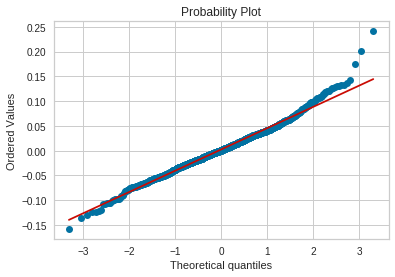

0       209307.353230
1       179651.715241
2       220271.871256
3       145491.603698
4       257211.981245
5       145405.182060
6       300233.428409
7       204939.558964
8       129624.695050
9       120253.235299
10      129713.732724
11      352976.168547
12      139670.821926
13      259098.903292
14      157227.607690
15      131535.504144
16      151622.737895
17       94647.947581
18      156851.565728
19      133916.814674
20      328024.389547
21      135626.097602
22      230786.412743
23      132951.694532
24      152725.767007
25      252125.388441
26      134516.441318
27      303595.476058
28      203172.143274
29       68379.146956
            ...      
1426    191088.230879
1427    140491.711275
1428     68207.635972
1429    187787.362807
1430    162505.457289
1431    172948.001487
1432    120594.264876
1433    391581.623157
1434    149319.213588
1435    190278.692622
1436    196197.416638
1437    146832.994453
1438    320083.610764
1439    118139.936716
1440    18

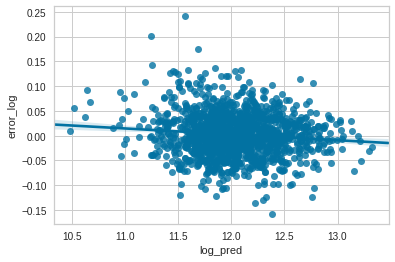

In [60]:
residuals['log_y'] = np.log1p(residuals['true_y'])
#sns.scatterplot(x="log_y", y="error_log", data=residuals, alpha=0.4)
residuals['log_pred'] = np.log1p(residuals['true_pred'])
sns.regplot(x="log_pred", y="error_log", data=residuals)


In [41]:
sorted(corrdict.items(), key = operator.itemgetter(1))

[(('SaleCondition', 'ScreenPorch'), -0.06544639565992122),
 (('OverallCond', 'PoolArea'), -0.060658683560640046),
 (('BldgType', 'ScreenPorch'), -0.06056313125749479),
 (('MSZoning', 'ScreenPorch'), -0.06009486260537178),
 (('logYearBuilt', 'ScreenPorch'), -0.059933000939048915),
 (('MasVnrType', 'ScreenPorch'), -0.05961054188773002),
 (('GarageType', 'PoolArea'), -0.05929185934393959),
 (('AvgBltRemod', 'ScreenPorch'), -0.05908038417400233),
 (('Functional', 'ScreenPorch'), -0.058568494615784714),
 (('SaleCondition', 'PoolArea'), -0.05836689691871027),
 (('GarageQual', 'ScreenPorch'), -0.05824356715856399),
 (('SaleType', 'ScreenPorch'), -0.058227471563014235),
 (('CentralAir', 'ScreenPorch'), -0.058060210973525),
 (('KitchenAbvGr', 'ScreenPorch'), -0.05703274396568969),
 (('Heating', 'ScreenPorch'), -0.056828888606251904),
 (('OverallCond', 'ScreenPorch'), -0.056777991847779034),
 (('logLotArea', 'ScreenPorch'), -0.05663920951558078),
 (('GarageCond', 'ScreenPorch'), -0.0565175400909

In [42]:
corrdict = {}
for col in topcols:
    for numcol in numcols:
        if numcol=="SalePrice":
            continue
        mycorr = np.corrcoef(np.log1p(z[col] / z[numcol]), z['error_log'])[0][1]
        if np.isnan(mycorr):
            continue
        corrdict[(col, numcol)] = mycorr 

for (col1, col2), mycorr in sorted(corrdict.items(), key=operator.itemgetter(1)):
    print (col1, '/', col2, mycorr)

OverallCond / ExterCond -0.048119020463809864
Neighborhood / OverallQual -0.046843910145308795
MasVnrType / BsmtQual -0.04550342048002863
Condition1 / BsmtQual -0.04517194114653412
Neighborhood / BsmtQual -0.04424998946350435
Condition1 / ExterQual -0.043767911791497104
Neighborhood / TotalSF -0.04357152058570225
MasVnrType / ExterQual -0.043431687944240294
Neighborhood / ExterQual -0.04271713789306575
MasVnrType / OverallQual -0.040687393867384195
Neighborhood / KitchenQual -0.039852885245548066
Condition1 / ExterCond -0.03935278005855145
Exterior1st / ExterQual -0.03912047654091542
Exterior1st / BsmtQual -0.03890251597464623
MasVnrType / TotalBath -0.03863583606429201
Neighborhood / TotRmsAbvGrd -0.038599423701349986
MasVnrType / ExterCond -0.03817059150947914
Condition1 / OverallQual -0.03777860203895531
Neighborhood / TotalBath -0.03679020822297751
OverallCond / ExterQual -0.036670562211003295
GarageQual / ExterCond -0.03635136026872244
Condition1 / TotRmsAbvGrd -0.0362363488421888

Foundation / BsmtCond 0.0015969201569056124
TotalSF / BsmtCond 0.0016120220631586667
TotalSF / HeatingQC 0.0016880043548023118
logYearBuilt / OverallQual 0.0016917929148121103
SaleType / logLotArea 0.0017168357832055574
PorchSF / MSSubClass 0.0017270132727079512
OverallQual / TotRmsAbvGrd 0.001733295040704271
CentralAir / ExterCond 0.0017543974568089357
logGrLivArea / MSSubClass 0.001943917853839873
BldgType / MSSubClass 0.0019531677675448723
logLotArea / MSSubClass 0.0019852727382076414
Foundation / logLotRatio 0.002030114974942977
AvgBltRemod / BsmtQual 0.0020339204876942732
Foundation / logTotalFinSF 0.0020440440795906514
sq2ndFlrSF / BsmtQual 0.002056484303546546
GarageType / OverallQual 0.0020577975122215825
logTotalFinSF / logBedRatio 0.0020652822320535546
Heating / HeatingQC 0.0021019444236562348
KitchenAbvGr / logBathRatio 0.002138141694227277
Foundation / logGrLivArea 0.0021961175594912056
logGrLivArea / logLotRatio 0.0021968806442864606
KitchenAbvGr / TotalBath 0.002254469389

#### Fix highly skewed predictors

In [43]:
### unskew, shrink outliers

def unskew_features(features, high_skew=0.5):
    
    numeric_col_ix = [i for i in features.columns if features[i].dtype in numeric_dtypes]

    skew_features = features[numeric_col_ix].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skew_features[skew_features > high_skew]
    skew_index = high_skew.index

    for i in skew_index:
        print(i)
        try:
            features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))
        except:
            pass

    return features

# doesn't seem to help, we already transformed with logs and squares
# df = unskew_features(df)

### 3. Review and Setup

In [44]:
# transform target to log target, expm1 at end
df['SalePrice'] = np.log1p(df['SalePrice'])

In [45]:
# drop these based on ProfileReport

dropcols = ['3SsnPorch',
            'EnclosedPorch',
            'OpenPorchSF',
            'ScreenPorch',
            'WoodDeckSF',
            'BsmtFinSF1',
            'BsmtFinSF2',
            'LowQualFinSF',
            'MiscVal',
            'PoolArea',
            'Street', 
           ]

df.drop(columns=dropcols, inplace=True)
print(df.shape)


(2915, 84)


In [46]:
pdf.ProfileReport(df)

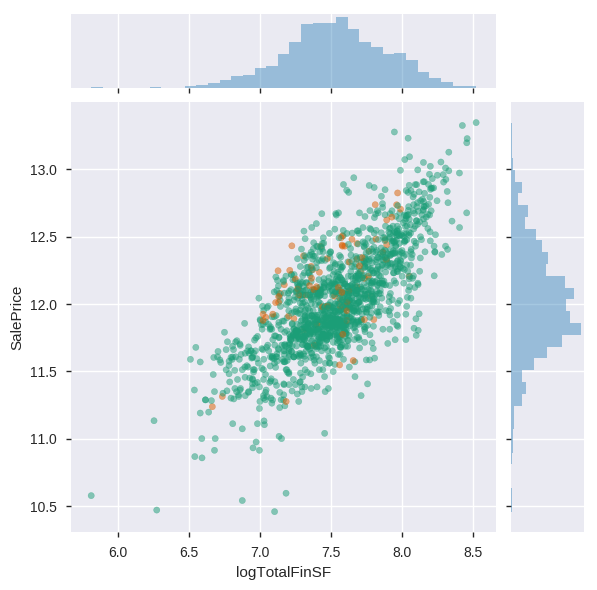

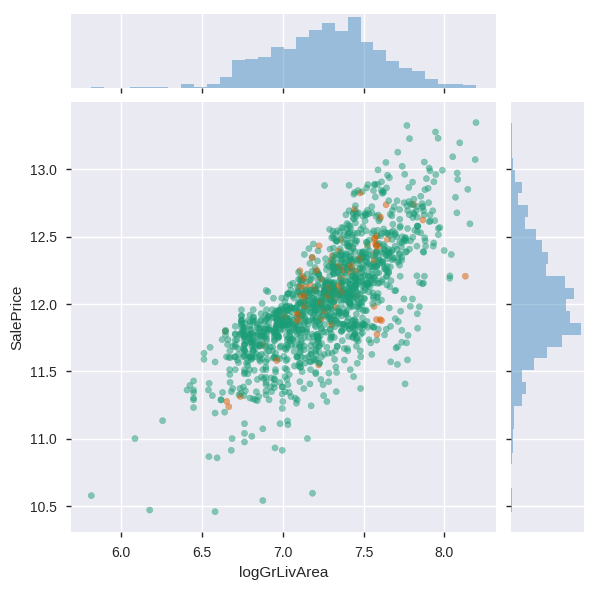

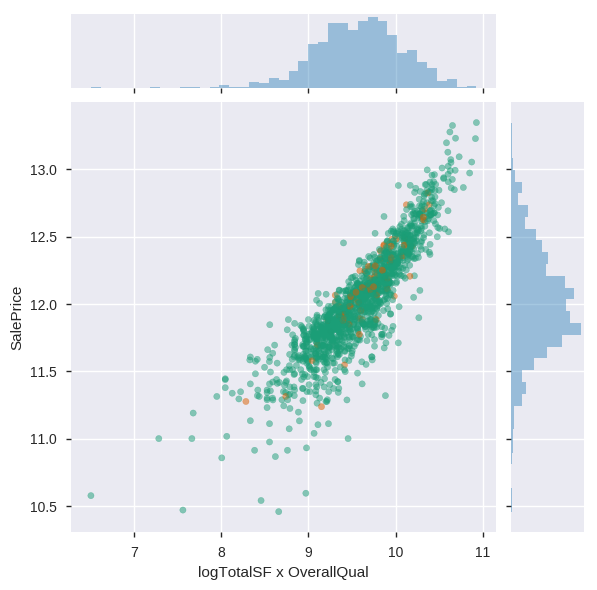

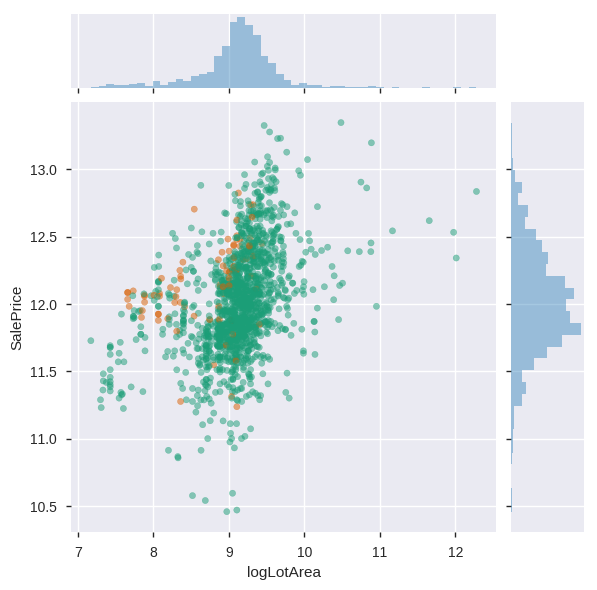

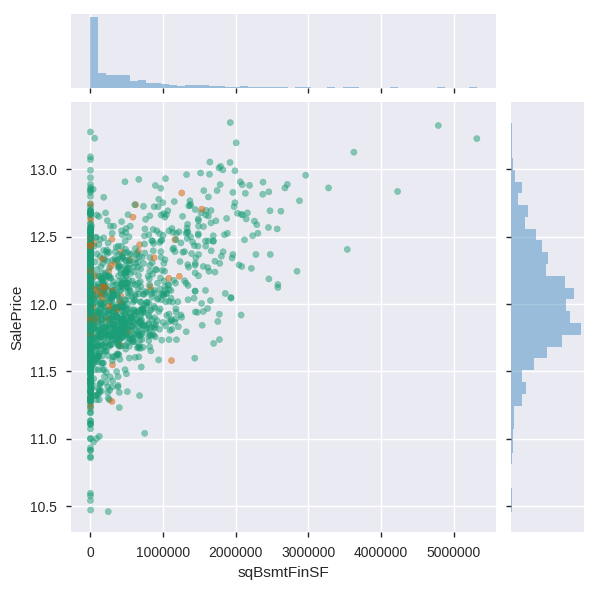

In [47]:
# few charts

response = 'SalePrice'
z = df.loc[~df["SalePrice"].isna()]

norm = matplotlib.colors.Normalize(vmin=0, vmax=21, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Dark2)
colordict = {k: i for i, k in enumerate(z['MSZoning'].unique())}

for var in ['logTotalFinSF','logGrLivArea','logYearBuilt','logTotalSF x OverallQual','logLotArea','sqBsmtFinSF',]:
    sns.jointplot(var, 
                  response, 
                  data=z, 
                  alpha=0.5, 
                  s=20, 
                  joint_kws={"color": z['MSZoning'].apply(lambda x: matplotlib.colors.to_hex(mapper.to_rgba(colordict[x])))}
                 )
    


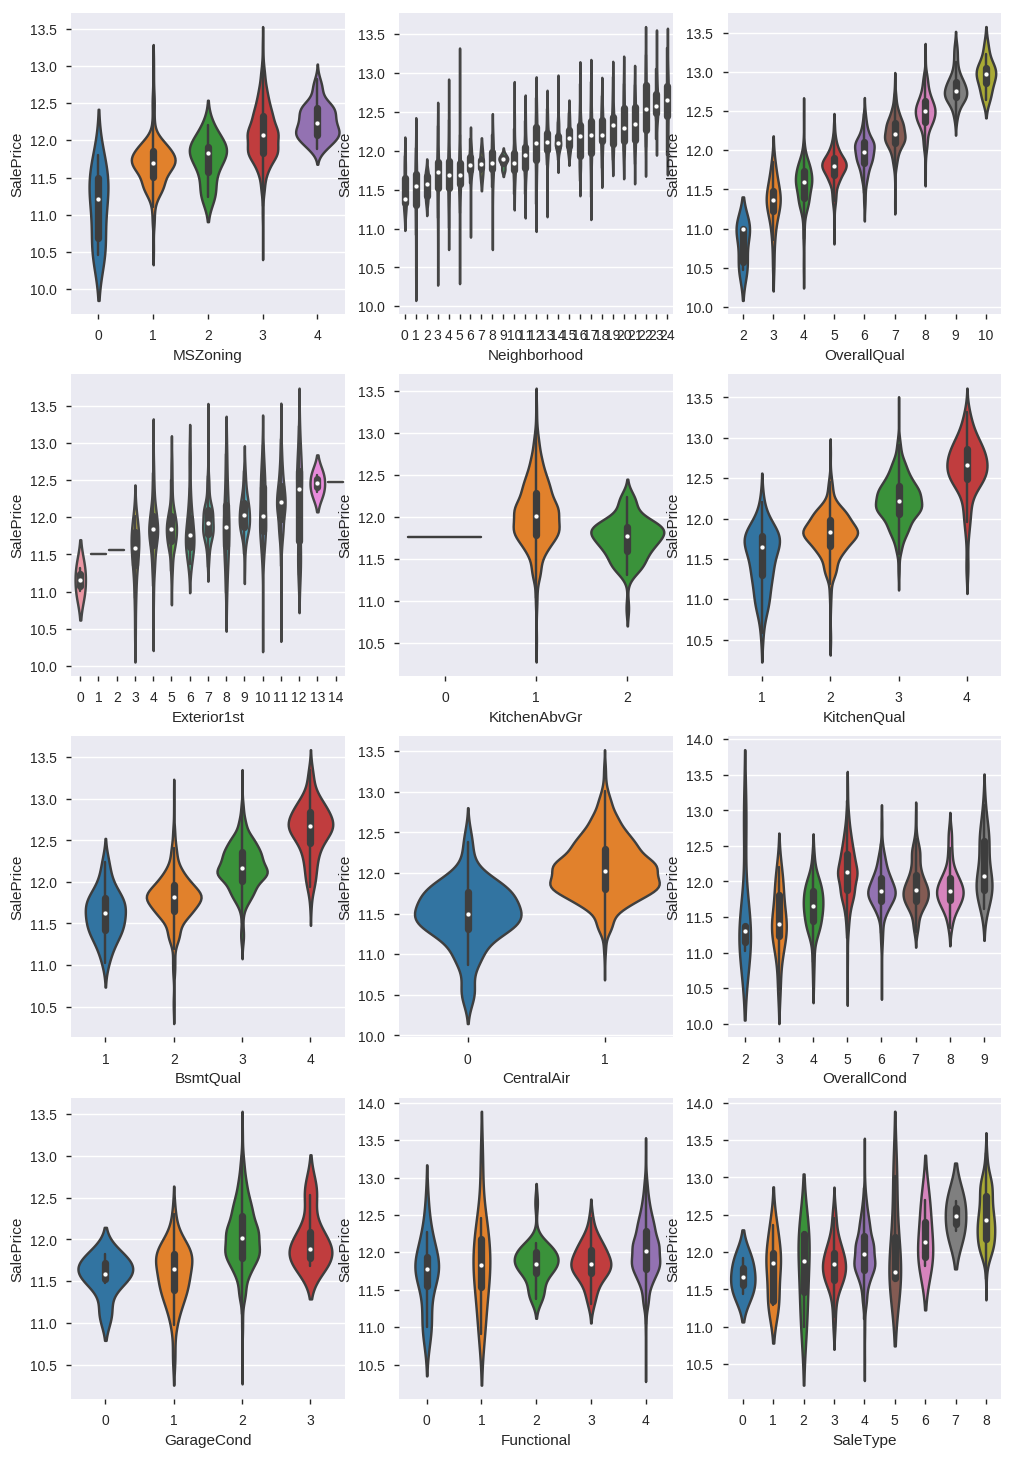

In [48]:
fig, ax = plt.subplots(figsize=(12,18), ncols=3, nrows=4)

for i, var in enumerate(['MSZoning','Neighborhood','OverallQual','Exterior1st','KitchenAbvGr','KitchenQual',
                         'BsmtQual', 'CentralAir','OverallCond','GarageCond','Functional','SaleType',]):
    sns.violinplot(x=var, y=response, data=z, ax = ax[i // 3][i % 3])    


In [49]:
widget_cats = []
widget_nums = []

for col in df.columns:
    if col == 'SalePrice':
        continue
    cardinality = len(df[col].value_counts())
    if cardinality <= 25:
        widget_cats.append(col)
    else:
        widget_nums.append(col)
        
widget_cats.sort()        
print(widget_cats)
print()
widget_nums.sort()
print(widget_nums)

['BedroomAbvGr', 'BldgType', 'BsmtBath', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'Functional x OverallQual', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MoSold', 'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'TotRmsAbvGrd', 'TotalBath', 'has2ndfloor', 'hasfireplace', 'logGarageRatio', 'logKitchenAbvGr x KitchenQual']

['1stFlrSF', 'AvgBltRemod', 'BsmtFinSF x BsmtBath', 'Functional x TotalFinSF', 'GarageArea', 'LotFrontage', 'MasVnrArea', 'PorchSF', 'TotalBsmtSF', 'TotalSF', 'YearRemodAd

Dropdown(description='Variable:', options=('1stFlrSF', 'AvgBltRemod', 'BsmtFinSF x BsmtBath', 'Functional x To…

Dropdown(description='Color by:', index=43, options=('BedroomAbvGr', 'BldgType', 'BsmtBath', 'BsmtCond', 'Bsmt…

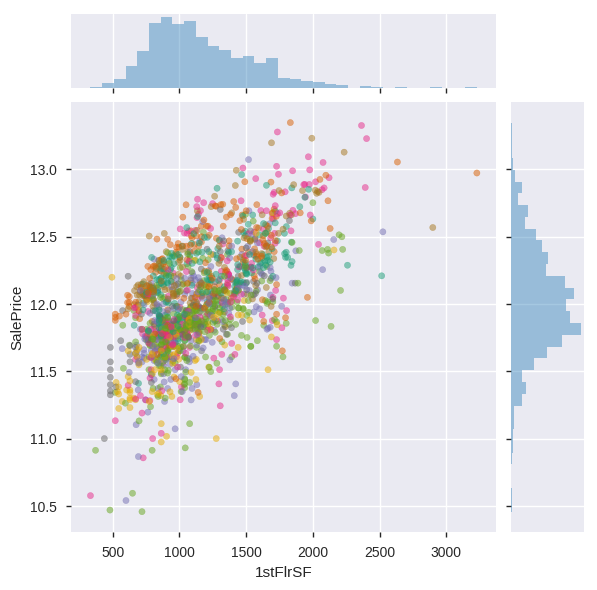

In [50]:
# interactive widget for continuous variables
def on_value_change1(change):
    do_refresh(change['new'], gColor)

def on_value_change2(change):
    do_refresh(gVar, change['new'])

def do_refresh(var=widget_nums[0], colorby="Neighborhood"):

    global gVar
    gVar = var
    global gColor
    gColor = colorby
    
    clear_output()
    dropdown1 = widgets.Dropdown(
        options=widget_nums,
        value=var,
        description='Variable:',
        disabled=False,)
    display(dropdown1)

    dropdown1.observe(on_value_change1, names='value')

    dropdown2 = widgets.Dropdown(
        options=widget_cats,
        value=colorby,
        description='Color by:',
        disabled=False,)
    display(dropdown2)
    dropdown2.observe(on_value_change2, names='value')
    
    response = 'SalePrice'
    z = df.loc[~df["SalePrice"].isna()]

    norm = matplotlib.colors.Normalize(vmin=0, vmax=21, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Dark2)
    
    colordict = {k: i for i, k in enumerate(z[colorby].unique())}
    
    sns.jointplot(var, 
                  response, 
                  data=z, 
                  alpha=0.5, 
                  s=20, 
                  joint_kws={"color": z[colorby].apply(lambda x: matplotlib.colors.to_hex(mapper.to_rgba(colordict[x])))}
                 )

do_refresh()
    


Dropdown(description='Cat:', options=('BedroomAbvGr', 'BldgType', 'BsmtBath', 'BsmtCond', 'BsmtExposure', 'Bsm…

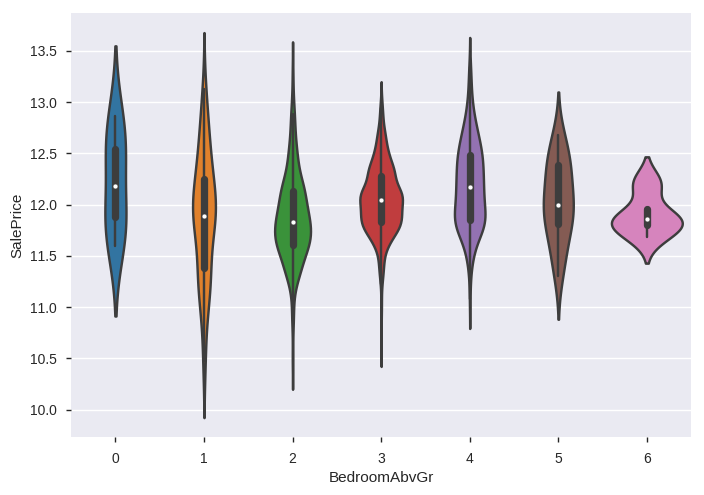

In [51]:
# interactive widget for categorical variables

def on_value_change3(change):
    do_refresh3(change['new'])

def do_refresh3(var=widget_cats[0]):

    clear_output()
    dropdown3 = widgets.Dropdown(
        options=widget_cats,
        value=var,
        description='Cat:',
        disabled=False,)
    display(dropdown3)
    dropdown3.observe(on_value_change3, names='value')
    
    response = 'SalePrice'
    z = df.loc[~df["SalePrice"].isna()]

    sns.violinplot(x=var, y=response, data=z)    

do_refresh3()
    

In [52]:
### compare correlations of log, linear, square, add transforms as necessary
### make categorical if low cardinality

z = df.loc[~df["SalePrice"].isna()]
for col in z.columns:
    if z[col].dtype not in numeric_dtypes:
        continue
    elif col=="SalePrice":
        continue
    log = (np.corrcoef(np.log1p(z[col]), z['SalePrice'])[0,1])
    linear = (np.corrcoef(z[col], z['SalePrice'])[0,1])
    square = (np.corrcoef(z[col]**2, z['SalePrice'])[0,1])
    print(col, 'log', log, 'linear', linear, 'square', square)
    
   

MSSubClass log -0.0004798907734951526 linear -0.04514451690638043 square -0.09328233312170445
MSZoning log 0.41753275148485824 linear 0.41279756852904714 square 0.3968974086646346
LandContour log 0.16278764070540458 linear 0.15709534886644297 square 0.13402513591086052
LotConfig log 0.12785450847566468 linear 0.14424571916822732 square 0.1537406785470078
Neighborhood log 0.6886270727823947 linear 0.7420311981460962 square 0.7282914789507746
Condition1 log 0.1850577692219324 linear 0.18380549468895432 square 0.14073313864977835
Condition2 log 0.09994001129659712 linear 0.11107229390058972 square 0.11426679287316456
BldgType log 0.18116649123563208 linear 0.183155943702183 square 0.17511133594202238
HouseStyle log 0.11447612264187941 linear 0.1393572946258224 square 0.1696622861142495
RoofStyle log 0.20614395906459587 linear 0.20475409957822752 square 0.2027659110664456
RoofMatl log 0.0953509553670977 linear 0.10014775446612688 square 0.10324327819452739
Exterior1st log 0.417342845182334

In [53]:
# # make these strings
# transformstr = ['HeatingQC', 'BsmtQual', 'BsmtCond', 'BsmtFullBath', 'TotRmsAbvGrd', 'Fireplaces', 
#                 'GarageQual', 'TotalBath', 'BsmtBath',  'HalfBath', 'MSSubClass',]

categorical_str = ['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig',
                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                   'Foundation', 'Heating', 'CentralAir', 'GarageType', 'SaleType',
                   'SaleCondition', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
                   'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
                   'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                   'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 
                   'Fireplaces', 'GarageCars', 'MoSold', 'monthnum']

for col in df.columns:
    cardinality = df[col].value_counts().shape[0]
    if ((cardinality <= 4) and (cardinality > 2) or (col in labelencoded)):
        print(col)
        df[col] = df[col].apply(str)
        

MSZoning
LandContour
LotConfig
Neighborhood
Condition1
Condition2
BldgType
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
Heating
GarageType
SaleType
SaleCondition
LotShape
LandSlope
ExterQual
ExterCond
BsmtQual
BsmtCond
HeatingQC
Electrical
KitchenQual
GarageFinish
GarageQual
GarageCond
PavedDrive
BsmtFullBath
HalfBath
KitchenAbvGr
Fireplaces


In [54]:
# transform categorical variables to dummies
print(df.shape)
df = pd.get_dummies(df)
#df = pd.get_dummies(df, drop_first=True)
print(df.shape)

(2915, 84)
(2915, 264)


In [55]:
# after dummifying, check for possible deletion or merger
low_variance = []

for i in df.columns:
    counts = df[i].value_counts()
    topval_count = counts.iloc[0]
    if topval_count / len(df) * 100 > 99.4:
        low_variance.append(i)

low_variance = list(low_variance)
low_variance

['LotConfig_3',
 'Neighborhood_7',
 'Condition1_5',
 'Condition1_6',
 'Condition2_0',
 'Condition2_1',
 'Condition2_2',
 'Condition2_3',
 'Condition2_5',
 'Condition2_6',
 'Condition2_7',
 'RoofStyle_2',
 'RoofStyle_5',
 'RoofMatl_0',
 'RoofMatl_2',
 'RoofMatl_4',
 'RoofMatl_5',
 'RoofMatl_6',
 'Exterior1st_0',
 'Exterior1st_1',
 'Exterior1st_13',
 'Exterior1st_14',
 'Exterior1st_2',
 'Exterior2nd_0',
 'Exterior2nd_12',
 'Exterior2nd_15',
 'Exterior2nd_3',
 'Exterior2nd_7',
 'Foundation_3',
 'Foundation_4',
 'Heating_0',
 'Heating_1',
 'Heating_2',
 'Heating_3',
 'GarageType_1',
 'SaleType_0',
 'SaleType_2',
 'SaleType_5',
 'SaleType_6',
 'SaleType_7',
 'SaleCondition_0',
 'LandSlope_2',
 'ExterCond_4',
 'Electrical_0',
 'GarageCond_0',
 'KitchenAbvGr_0',
 'Fireplaces_3']

In [56]:
dropcols = []
for col in df.columns:
    most_frequent = df[col].value_counts().iloc[0]
    if most_frequent  >= 2910:
        dropcols.append(col)
        print(col, most_frequent)

df.drop(columns=dropcols, inplace=True)

Condition2_0 2913
Condition2_1 2910
Condition2_3 2914
Condition2_5 2914
Condition2_6 2911
Condition2_7 2912
RoofStyle_5 2910
RoofMatl_0 2914
RoofMatl_2 2914
RoofMatl_5 2914
Exterior1st_1 2913
Exterior1st_13 2913
Exterior1st_14 2914
Exterior1st_2 2913
Exterior2nd_0 2912
Exterior2nd_15 2914
Exterior2nd_3 2911
Foundation_4 2910
Heating_0 2914
Heating_3 2913
SaleType_7 2910
KitchenAbvGr_0 2912


In [57]:
# split off train, test
df_test = df.loc[df['SalePrice'].isna()]
print(df_test.shape)

df = df.loc[~df['SalePrice'].isna()]
df.shape

(1459, 242)


(1456, 242)

In [58]:
# do train test split on train
response = 'SalePrice'
predictors = [p for p in df.columns if p not in [response, 'YrSold']]

X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[response], test_size=.25)

### 4. Tune 

In [59]:
def evaluate(y_train, y_pred_train, y_test, y_pred_test):
    print('Train RMSE', np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_pred_train))))
    print('Train R-squared', r2_score(np.expm1(y_train), np.expm1(y_pred_train)))
    print('Train MAE', mean_absolute_error(np.expm1(y_train), np.expm1(y_pred_train)))
    print()
    print('Test RMSE', np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_test))))
    print('Test R-squared', r2_score(np.expm1(y_test), np.expm1(y_pred_test)))
    print('Test MAE', mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_test)))

def evaluate2(y_train, y_pred_train, prefix = "Train"):
    print('%s RMSE (log)' % prefix, np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('%s RMSE' % prefix, np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_pred_train))))
    print('%s R-squared' % prefix, r2_score(np.expm1(y_train), np.expm1(y_pred_train)))
    print('%s MAE' % prefix, mean_absolute_error(np.expm1(y_train), np.expm1(y_pred_train)))
    return r2_score(np.expm1(y_train), np.expm1(y_pred_train))

In [60]:
# use 10 kfolds for CV
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)


In [61]:
%%time
# linear regression

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
evaluate(y_train, y_pred_train, y_test, y_pred_test)



Train RMSE 15886.701233542673
Train R-squared 0.9582624088490749
Train MAE 10661.434030066552

Test RMSE 19902.435532141266
Test R-squared 0.9261870256923079
Test MAE 13192.233610193342
CPU times: user 128 ms, sys: 16 ms, total: 144 ms
Wall time: 25.8 ms


Train RMSE 17010.801645485964
Train R-squared 0.9521469652578485
Train MAE 11088.126027729057

Test RMSE 18457.747529741173
Test R-squared 0.936514045052133
Test MAE 12083.062473712123


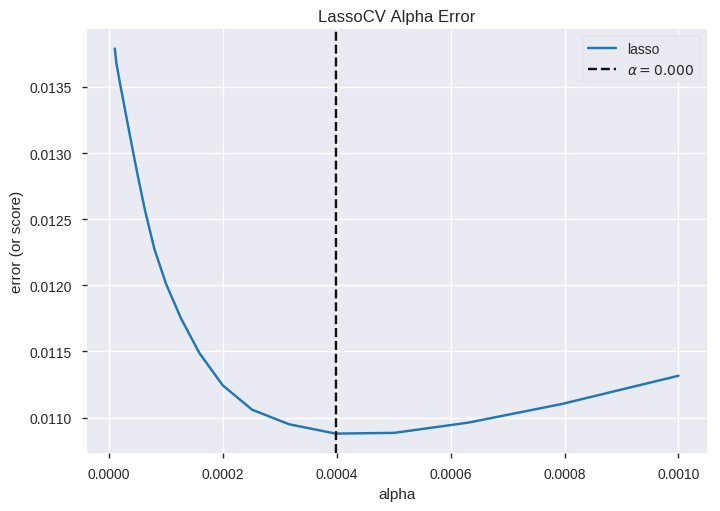

CPU times: user 15.8 s, sys: 220 ms, total: 16 s
Wall time: 2.74 s


In [62]:
%%time
# visualize lasso with yellowbrick
scaler = use_transform()
scaler.fit(X_train)
X_tr = scaler.transform(X_train)

#alphas = np.logspace(-5, 4, 19)
alphas = np.logspace(-5, -3, 21)
visualizer = AlphaSelection(LassoCV(alphas=alphas, max_iter=20000, cv=kfolds))
visualizer.fit(X_tr, y_train)

y_pred_train = visualizer.predict(X_tr)
y_pred_test = visualizer.predict(scaler.transform(X_test))
evaluate(y_train, y_pred_train, y_test, y_pred_test)

visualizer.poof()

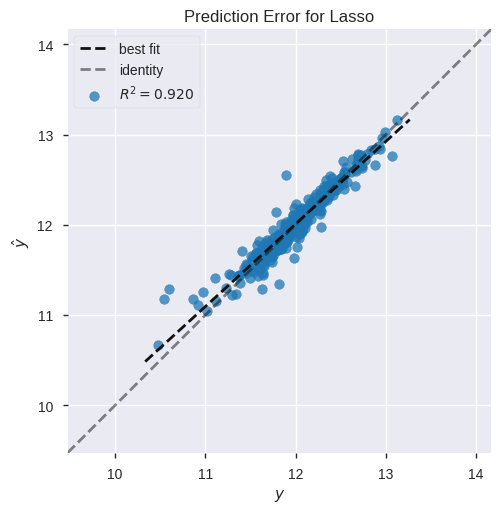

CPU times: user 1.03 s, sys: 24 ms, total: 1.06 s
Wall time: 177 ms


In [63]:
%%time
visualizer = PredictionError(Lasso(alpha=0.00039810717055349735))
visualizer.fit(X_tr, y_train)
visualizer.score(scaler.transform(X_test), y_test)
visualizer.poof()

In [64]:
%%time
# tune LassoCV search space
# note train error is worse when using lasso regularization but test is better
# regularization reduces overfitting

lasso = make_pipeline(use_transform(),
                         LassoCV(alphas=np.logspace(-4, -2, 11),
                                 max_iter=100000,
                                 cv=kfolds))

lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
evaluate(y_train, y_pred_train, y_test, y_pred_test)
print('alpha', lasso._final_estimator.alpha_)

Train RMSE 17010.801645485964
Train R-squared 0.9521469652578485
Train MAE 11088.126027729057

Test RMSE 18457.747529741173
Test R-squared 0.936514045052133
Test MAE 12083.062473712123
alpha 0.00039810717055349735
CPU times: user 2.21 s, sys: 32 ms, total: 2.24 s
Wall time: 391 ms


In [65]:
imp_lasso = pd.DataFrame({"Feature Importance" : lasso._final_estimator.coef_}, index=predictors)
imp_lasso["Feature Importance"]=abs(imp_lasso["Feature Importance"])
imp_lasso[imp_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [66]:
%%time
# visualize ridge with yellowbrick
scaler = use_transform()
scaler.fit(X_train)
X_tr = scaler.transform(X_train)

#alphas = np.logspace(-2, 3, 11)
alphas = np.logspace(0, 2, 21)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X_tr, y_train)

y_pred_train = visualizer.predict(X_tr)
y_pred_test = visualizer.predict(scaler.transform(X_test))
evaluate(y_train, y_pred_train, y_test, y_pred_test)

visualizer.poof()

Train RMSE 17197.58070217233
Train R-squared 0.9510903408480424
Train MAE 11308.281868089976

Test RMSE 18663.602434828674
Test R-squared 0.935090060639933
Test MAE 12194.497947563896


CPU times: user 1.6 s, sys: 40 ms, total: 1.64 s
Wall time: 299 ms


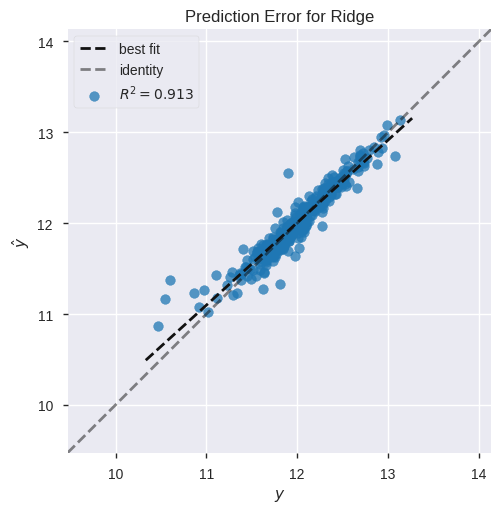

CPU times: user 876 ms, sys: 16 ms, total: 892 ms
Wall time: 149 ms


In [67]:
%%time
visualizer = PredictionError(Ridge(alpha=15.848931924611142))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [68]:
%%time
# tune RidgeCV search space
alphas = np.logspace(0, 2, 21)

ridge = make_pipeline(use_transform(),
                         RidgeCV(cv=kfolds, alphas=alphas))

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
evaluate(y_train, y_pred_train, y_test, y_pred_test)
print('alpha', ridge._final_estimator.alpha_)

Train RMSE 17032.531566135385
Train R-squared 0.95202463042298
Train MAE 11221.428823240554

Test RMSE 18634.280168710207
Test R-squared 0.9352938595995346
Test MAE 12129.220803379394
alpha 15.848931924611142
CPU times: user 5.9 s, sys: 104 ms, total: 6 s
Wall time: 1.02 s


In [69]:
%%time
# Tune ElasticNetCV search space for alphas and l1_ratio
print("ElasticNetCV")

elasticnet = make_pipeline(use_transform(),
                           ElasticNetCV(max_iter=100000, 
                                        #l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
                                        l1_ratio=np.linspace(0.6, 0.8, 21),
                                        alphas=np.logspace(-4, -2, 21),
                                        cv=kfolds))
elasticnet.fit(X_train, y_train)

y_pred_train = elasticnet.predict(X_train)
y_pred_test = elasticnet.predict(X_test)
evaluate(y_train, y_pred_train, y_test, y_pred_test)
print('l1_ratio', elasticnet._final_estimator.l1_ratio_)
print('alpha', elasticnet._final_estimator.alpha_)


ElasticNetCV
Train RMSE 17132.256175543695
Train R-squared 0.9514611990899596
Train MAE 11144.729733570037

Test RMSE 18503.764648041903
Test R-squared 0.9361970960392587
Test MAE 12146.611174860629
l1_ratio 0.72
alpha 0.000630957344480193
CPU times: user 1min 2s, sys: 948 ms, total: 1min 3s
Wall time: 10.6 s


In [70]:
%%time
# tune KernelRidge
print("KernelRidge")

kralphas = np.logspace(-5,0,11)
kralpha = 0.1

# linear, poly
# degree 1,2,3
coef0s = np.linspace(1,10, 19)
coef0=6

krdegrees = [1,2,3]
krdegree = 1

for i in [1]:

    kr = make_pipeline(use_transform(),
                       KernelRidge(alpha=kralpha, kernel='poly', degree=krdegree, coef0=coef0)
                      )
    print(kr)
    kr.fit(X_train, y_train)

    y_pred_train = kr.predict(X_train)
    y_pred_test = kr.predict(X_test)
    evaluate(y_train, y_pred_train, y_test, y_pred_test)
    print()

KernelRidge
Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('kernelridge', KernelRidge(alpha=0.1, coef0=6, degree=1, gamma=None, kernel='poly',
      kernel_params=None))])
Train RMSE 17342.654325198837
Train R-squared 0.950261686011456
Train MAE 11402.731291392514

Test RMSE 18694.734433360325
Test R-squared 0.9348733327567409
Test MAE 12270.31776846445

CPU times: user 412 ms, sys: 12 ms, total: 424 ms
Wall time: 70.8 ms


In [71]:
%%time
# tune SVR
print("SVR")

Cs = np.logspace(0,2,5)
C = 10.0

epsilons = np.logspace(-5,0,11)
epsilon = 0.03162277660168379

svrgammas = np.logspace(-5,0,11)
svrgamma = 0.001

#for svrgamma in svrgammas:

svr = make_pipeline(use_transform(),
                    SVR(kernel='rbf', 
    #                        degree=3, 
                        gamma=svrgamma,
    #                        coef0=0.0, 
    #                        tol=0.001, 
                        C=C, 
                        epsilon=epsilon, 
    #                        shrinking=True, 
    #                        cache_size=200, 
    #                        verbose=False, 
    #                        max_iter=-1))
                       ))
print(svr)
svr.fit(X_train, y_train)

y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)
evaluate(y_train, y_pred_train, y_test, y_pred_test)


SVR
Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('svr', SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03162277660168379,
  gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False))])
Train RMSE 14065.241008510202
Train R-squared 0.96728444588714
Train MAE 8702.898322208974

Test RMSE 18417.92293170838
Test R-squared 0.9367877052144555
Test MAE 11637.410846454326
CPU times: user 1.26 s, sys: 24 ms, total: 1.29 s
Wall time: 603 ms


In [72]:
%%time
# tune Gradient Boost
print("Gradient Boost")
gbestimatorss = np.logspace(2,4,9)
gbestimators = 5623
gbdepth = 2
gblearnrate = 0.01

for i in [1]:
                           
    gb = GradientBoostingRegressor(n_estimators=int(gbestimators), 
                                   learning_rate=gblearnrate,
                                   max_depth=gbdepth, 
                                   max_features='sqrt',
                                   min_samples_leaf=16, 
                                   loss='huber', 
                                   subsample=0.8, 
                                   random_state=42)
    print(gb)
    gb.fit(X_train, y_train)
    
    y_pred_train = gb.predict(X_train)
    y_pred_test = gb.predict(X_test)
    evaluate(y_train, y_pred_train, y_test, y_pred_test)
    print()


Gradient Boost
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=16, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=5623,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Train RMSE 13707.165837530665
Train R-squared 0.9689289980405121
Train MAE 8661.789916199348

Test RMSE 19169.08516545104
Test R-squared 0.9315264210818265
Test MAE 11915.8474296757

CPU times: user 5.54 s, sys: 4 ms, total: 5.54 s
Wall time: 5.54 s


In [73]:
%%time
# tune XGBoost
print("XGBoost")
# XGboost - most sophisticated decision tree model
# tuned sequentially
# no log1p

#n_estimators_xgb: number of base learner trees
n_estimators_xgbs=[100, 178, 316, 562, 1000, 1778, 3162, 5623, 10000]
n_estimators_xgb = 5623

#max_depth: max depth per base tree
max_depths = range(2,12)
max_depth = 3

#subsample: row subsampling rate (similar to RF)
subsamples = np.linspace(0.4, 0.8, 9)
subsample = 0.55

#colsample_bytree: feature subsampling rate (similar to RF)
colsample_bytrees = np.linspace(0.1, 0.8, 15)
colsample_bytree = 0.1

reg_alphas = np.logspace(-7, 0, 15)
reg_alpha = 3.1622776601683795e-06

gammas = [0, 1, 5]
gammas = [0]
gamma = 0

#learning_rate_xgb: shrinkage factor applied to each base tree update
learning_rate_xgbs = np.logspace(-2, 0, 5)
learning_rate_xgbs = [0.01]
learning_rate_xgb = 0.01

for learning_rate_xgb in learning_rate_xgbs:
 
        xgb = XGBRegressor(
            max_depth=max_depth,
            n_estimators=n_estimators_xgb,
            gamma=gamma,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            learning_rate=learning_rate_xgb,
            min_child_weight=0,
            reg_alpha=reg_alpha,
            n_jobs=-1)
    
        display(xgb)
    
        scores = np.sqrt(-cross_val_score(xgb, df[predictors], df[response],
                                      scoring="neg_mean_squared_error",
                                      cv=kfolds))
        
        print("CV Score %.04f (STD %.04f)" % (np.mean(scores), np.std(scores)))
        print()

xgb.fit(X_train, y_train.values.reshape(-1))
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
evaluate(y_train, y_pred_train, y_test, y_pred_test)


XGBoost


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=0, missing=None, n_estimators=5623, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=3.1622776601683796e-06, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.55)

CV Score 0.1097 (STD 0.0132)

Train RMSE 6694.54428262225
Train R-squared 0.9925885708495907
Train MAE 4891.314224187273

Test RMSE 20072.173288954833
Test R-squared 0.924922630211304
Test MAE 12323.640485491076
CPU times: user 5min 5s, sys: 3.43 s, total: 5min 9s
Wall time: 25.9 s


In [74]:
%%time
# tune LightGBM
print("LightGBM")
#n_estimators_lgbm: number of base learner trees
n_estimators_lgbms=[100, 178, 316, 562, 1000, 1778, 3162, 5623, 10000]
n_estimators_lgbm = 5623

#max_depth: max depth per base tree
num_leavess = range(2,12)
num_leaves = 6

#subsample: row subsampling rate (similar to RF)
bagging_fractions = np.linspace(0.6, 0.8, 9)
bagging_fraction = 0.75

#colsample_bytree: feature subsampling rate (similar to RF)
feature_fractions = np.linspace(0.05, 0.3, 26)
feature_fraction = 0.1

#learning_rate: shrinkage factor applied to each base tree update
learning_rates = np.logspace(-3, 0, 7)
learning_rates = [0.01]
learning_rate_lgbm = 0.01

for learning_rate_lgbm in learning_rates:
    print(num_leaves,
          n_estimators_lgbm,
          bagging_fraction,
          feature_fraction,
         )
    
    lgbm = LGBMRegressor(objective='regression',
                         num_leaves=num_leaves,
                         learning_rate=learning_rate_lgbm,
                         n_estimators=n_estimators_lgbm,
                         max_bin=200,
                         bagging_fraction=bagging_fraction,
                         feature_fraction=feature_fraction,
                         feature_fraction_seed=7,
                         min_data_in_leaf=2,
                         verbose=-1,
                         )
    
    scores = np.sqrt(-cross_val_score(lgbm, df[predictors], df[response],
                                      scoring="neg_mean_squared_error",
                                      cv=kfolds))
    
    print("CV Score %.04f (STD %.04f)" % (np.mean(scores), np.std(scores)))

    print()

lgbm.fit(X_train, y_train.values.reshape(-1))
y_pred_train = lgbm.predict(X_train)
y_pred_test = lgbm.predict(X_test)
evaluate(y_train, y_pred_train, y_test, y_pred_test)


LightGBM
6 5623 0.75 0.1
CV Score 0.1091 (STD 0.0124)

Train RMSE 6782.164360025437
Train R-squared 0.9923932955126487
Train MAE 4963.0887005937075

Test RMSE 19961.415868106647
Test R-squared 0.9257488918993378
Test MAE 12353.18810833158
CPU times: user 2min 15s, sys: 300 ms, total: 2min 16s
Wall time: 11.4 s


In [75]:
# tune MLPRegressor
print("MLPregressor")

activations = ['relu']
activation = 'relu'

solvers = ['lbfgs']
solver = 'lbfgs'

alphas = np.logspace(-1, 2, 7)
alpha = 10

learning_rates = ['invscaling']
learning_rate = 'invscaling'

nhiddenlayerss = [1]
nstartlayers = [8, 16, 32, 64, 128,]
layerspecs = product(nhiddenlayerss, nstartlayers)
layerspec = [1, 128]

results_dict = {}

paramlist = product(layerspecs, 
                    activations, 
                    solvers, 
                    alphas, 
                    learning_rates)

#for i, (layerspec, activation, solver, alpha, learning_rate) in enumerate(paramlist):
for i in [1]:
    
    nhiddenlayers, nstartlayer = layerspec
    key = (nhiddenlayers, nstartlayer, alpha)
    mlplayers = []
    for i in range(nhiddenlayers):
        mlplayers.append(nstartlayer)
        nstartlayer = nstartlayer // 4

    print("Iteration %d: %s, %s, %s, alpha = %f, learning rate = %s" % (i,
                            str(mlplayers),
                            activation,
                            solver,
                            alpha,
                            learning_rate,
                           ))
    
    mlp = make_pipeline(use_transform(),
                        MLPRegressor(hidden_layer_sizes=mlplayers,
                                     activation=activation,
                                     solver=solver,
                                     alpha=alpha,
                                     learning_rate=learning_rate,
                                     max_iter=10000))
    
    #print(mlp)
    
    try:
        scores = np.sqrt(-cross_val_score(mlp, df[predictors], df[response],
                                          scoring="neg_mean_squared_error",
                                          cv=kfolds))
        results_dict[key] = np.mean(scores)
        print("CV Score %.04f (STD %.04f)" % (np.mean(scores), np.std(scores)))
        print()
    except:
        pass

mlp.fit(X_train, y_train.values.reshape(-1))
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)
try:
    evaluate(y_train, y_pred_train, y_test, y_pred_test)
except:
    pass

MLPregressor
Iteration 0: [128], relu, lbfgs, alpha = 10.000000, learning rate = invscaling
CV Score 0.1083 (STD 0.0126)

Train RMSE 17991.140439435007
Train R-squared 0.9464724567070811
Train MAE 11788.173154188242

Test RMSE 18984.704380151124
Test R-squared 0.9328373332484424
Test MAE 12610.80863685559


In [76]:
mlp_matrix = pd.DataFrame({
    'nlayers' : [k[0] for k in results_dict.keys()],
    'nunits' : [k[1] for k in results_dict.keys()],
    'alpha' : [np.round(k[2],4) for k in results_dict.keys()],
    'score' : [s for s in results_dict.values()],
})


In [77]:
mlp_pivot = mlp_matrix.pivot_table(index='nunits', 
                                   columns='alpha',
                                   values='score', 
                                   aggfunc='mean')

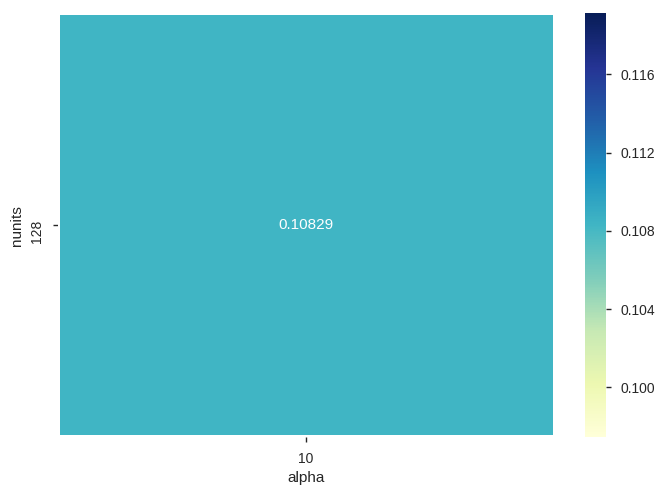

In [78]:
sns.heatmap(mlp_pivot, cmap="YlGnBu", linewidths=1.5, annot=True, annot_kws={'size': 11}, fmt='.5f')

# , linewidths=1.5, annot=True, square=True, 
#                 fmt='.4f', annot_kws={'size': 10}, 
#                 yticklabels=df_predictions.columns , xticklabels=df_predictions.columns
#             )

### 5. Train and evaluate tuned models on full training set

In [79]:
# drop outliers with big misses before retrain on full training set, so they don't distort test for submission

#outliers = [30, 88, 462, 631, 1322]
# big raw misses 
# outliers = [687, 801, 896, 1320, 631]

outliers = [687, 801, 896, 1320, 1449, 462, 631]
df=df.reset_index(drop=True)
print(df.loc[outliers]['SalePrice'])
print(np.expm1(df.loc[outliers]['SalePrice']))

687     12.879020
801     13.275829
896     13.323929
1320    11.898195
1449    11.344519
462     11.041064
631     11.320566
Name: SalePrice, dtype: float64
687     392000.0
801     582933.0
896     611657.0
1320    147000.0
1449     84500.0
462      62383.0
631      82500.0
Name: SalePrice, dtype: float64


In [80]:
print(df[predictors].shape)
df.drop(outliers, inplace=True)
# if you don't reset index here, then on assigment of model results some indexes don't line up and you get NAs 
df=df.reset_index(drop=True)
print(df[predictors].shape)
df.tail()

(1456, 241)
(1449, 241)


MSSubClass  HouseStyle  CentralAir  OverallQual  OverallCond  \
1444          60           5           1            6            5   
1445          20           0           1            6            6   
1446          70           5           1            7            9   
1447          20           0           1            5            6   
1448          20           0           1            5            6   

      BsmtExposure  BsmtFinType1  BsmtFinType2  Functional  FireplaceQu  \
1444             1             1             1           4            2   
1445             1             5             4           3            2   
1446             1             6             1           4            3   
1447             2             6             4           4            2   
1448             1             3             2           4            2   

      Fence  logYearBuilt  YearRemodAdd  FullBath  BedroomAbvGr  TotRmsAbvGrd  \
1444      0      2.484907            10         2             3             7   
1445      3      3.496508            22         2             3             7   
1446      4      4.248495             4         2             4             9   
1447      0      4.110874            14         1             2             5   
1448      0      3.828641            45         1             3             6   

      logGarageYrBlt  GarageCars  LotFrontage  logLotArea  MasVnrArea  \
1444        2.484907           2         62.0    8.976894         0.0   
1445        3.496508           2         85.0    9.486152       119.0   
1446        4.248495           1         66.0    9.109746         0.0   
1447        4.110874           1         68.0    9.181735         0.0   
1448        3.828641           1         75.0    9.204121         0.0   

      sqBsmtUnfSF  TotalBsmtSF  1stFlrSF  sq2ndFlrSF  logGrLivArea  \
1444     908209.0        953.0       953      481636      7.407318   
1445     346921.0       1542.0      2073           0      7.637234   
1446     769129.0       1152.0      1188     1327104      7.758333   
1447          0.0       1078.0      1078           0      6.983790   
1448      18496.0       1256.0      1256           0      7.136483   

      GarageArea  SalePrice  logTotalFinSF  TotalSF  sqBsmtFinSF  PorchSF  \
1444       460.0  12.072547       7.407318   2600.0          0.0       40   
1445       500.0  12.254868       8.015327   3615.0     908209.0      349   
1446       252.0  12.493133       7.869402   3492.0      75625.0       60   
1447       240.0  11.864469       7.676474   2156.0    1162084.0      478   
1448       276.0  11.901590       7.773594   2512.0    1254400.0      804   

      TotalBath  BsmtBath  AvgBltRemod  logLivAreaRatio  logBedRatio  \
1444        2.5       0.0         10.5         0.283981     6.309918   
1445        3.0       1.0         27.0         0.242462     6.539586   
1446        2.0       0.0         36.5         0.326565     6.373320   
1447        2.0       1.0         37.0         0.200390     6.291569   
1448        2.5       1.0         45.0         0.225375     6.039461   

      logGarageRatio  logBathRatio  logLotRatio  has2ndfloor  hasfireplace  \
1444        0.510826      0.606136     4.857434            1             1   
1445        0.510826      0.693147     5.049856            0             1   
1446        0.223144      0.405465     4.927254            1             1   
1447        0.405465      0.693147     4.969098            0             0   
1448        0.287682      0.606136     4.894052            0             0   

      logTotalSF x OverallQual  sqBsmtFinSF x BsmtQual  BsmtFinSF x BsmtBath  \
1444                  9.655090                     0.0                   0.0   
1445                  9.984653               8173881.0                 953.0   
1446                 10.104181                302500.0                   0.0   
1447                  9.285541               4648336.0                1078.0   
1448                  

In [81]:
# store results
full_train_df = pd.DataFrame({'log_y': df[response],
                             'true_y': np.expm1(df[response])
                             })

xval_df = pd.DataFrame({'log_y': df[response],
                       'true_y': np.expm1(df[response])
                       })

cvscores = {}


In [82]:
%%time

models = {
    'xgb'  : xgb, 
    'lgbm' : lgbm, 
    'gb'   : gb,
    'svr'  : svr,
    'kr'   : kr,
    'mlp'  : mlp,
    'lasso': lasso,
    'ridge': ridge,
    'elasticnet' : elasticnet
}

for k, m in models.items():
    print(datetime.datetime.now(), k)
    # xval predictions
    xval_df[k] = cross_val_predict(m, df[predictors], df[response], cv=kfolds)

    # cross-val score
    cvscores[k] = np.sqrt(mean_squared_error(xval_df['log_y'], xval_df[k]))
    print("CV Score %.04f" % (cvscores[k]))

    # full train
    m.fit(df[predictors], df[response])
    full_train_df[k] = m.predict(df[predictors])
    
    print()

2019-05-21 22:01:40.124617 xgb
CV Score 0.1052

2019-05-21 22:02:06.175725 lgbm
CV Score 0.1057

2019-05-21 22:02:17.427101 gb
CV Score 0.1044

2019-05-21 22:03:23.582729 svr
CV Score 0.1004

2019-05-21 22:03:28.797581 kr
CV Score 0.1021

2019-05-21 22:03:29.550110 mlp
CV Score 0.1029

2019-05-21 22:03:48.592644 lasso
CV Score 0.1010

2019-05-21 22:03:52.937828 ridge
CV Score 0.1025

2019-05-21 22:04:04.200389 elasticnet
CV Score 0.1011

CPU times: user 24min 35s, sys: 16.6 s, total: 24min 52s
Wall time: 4min 31s


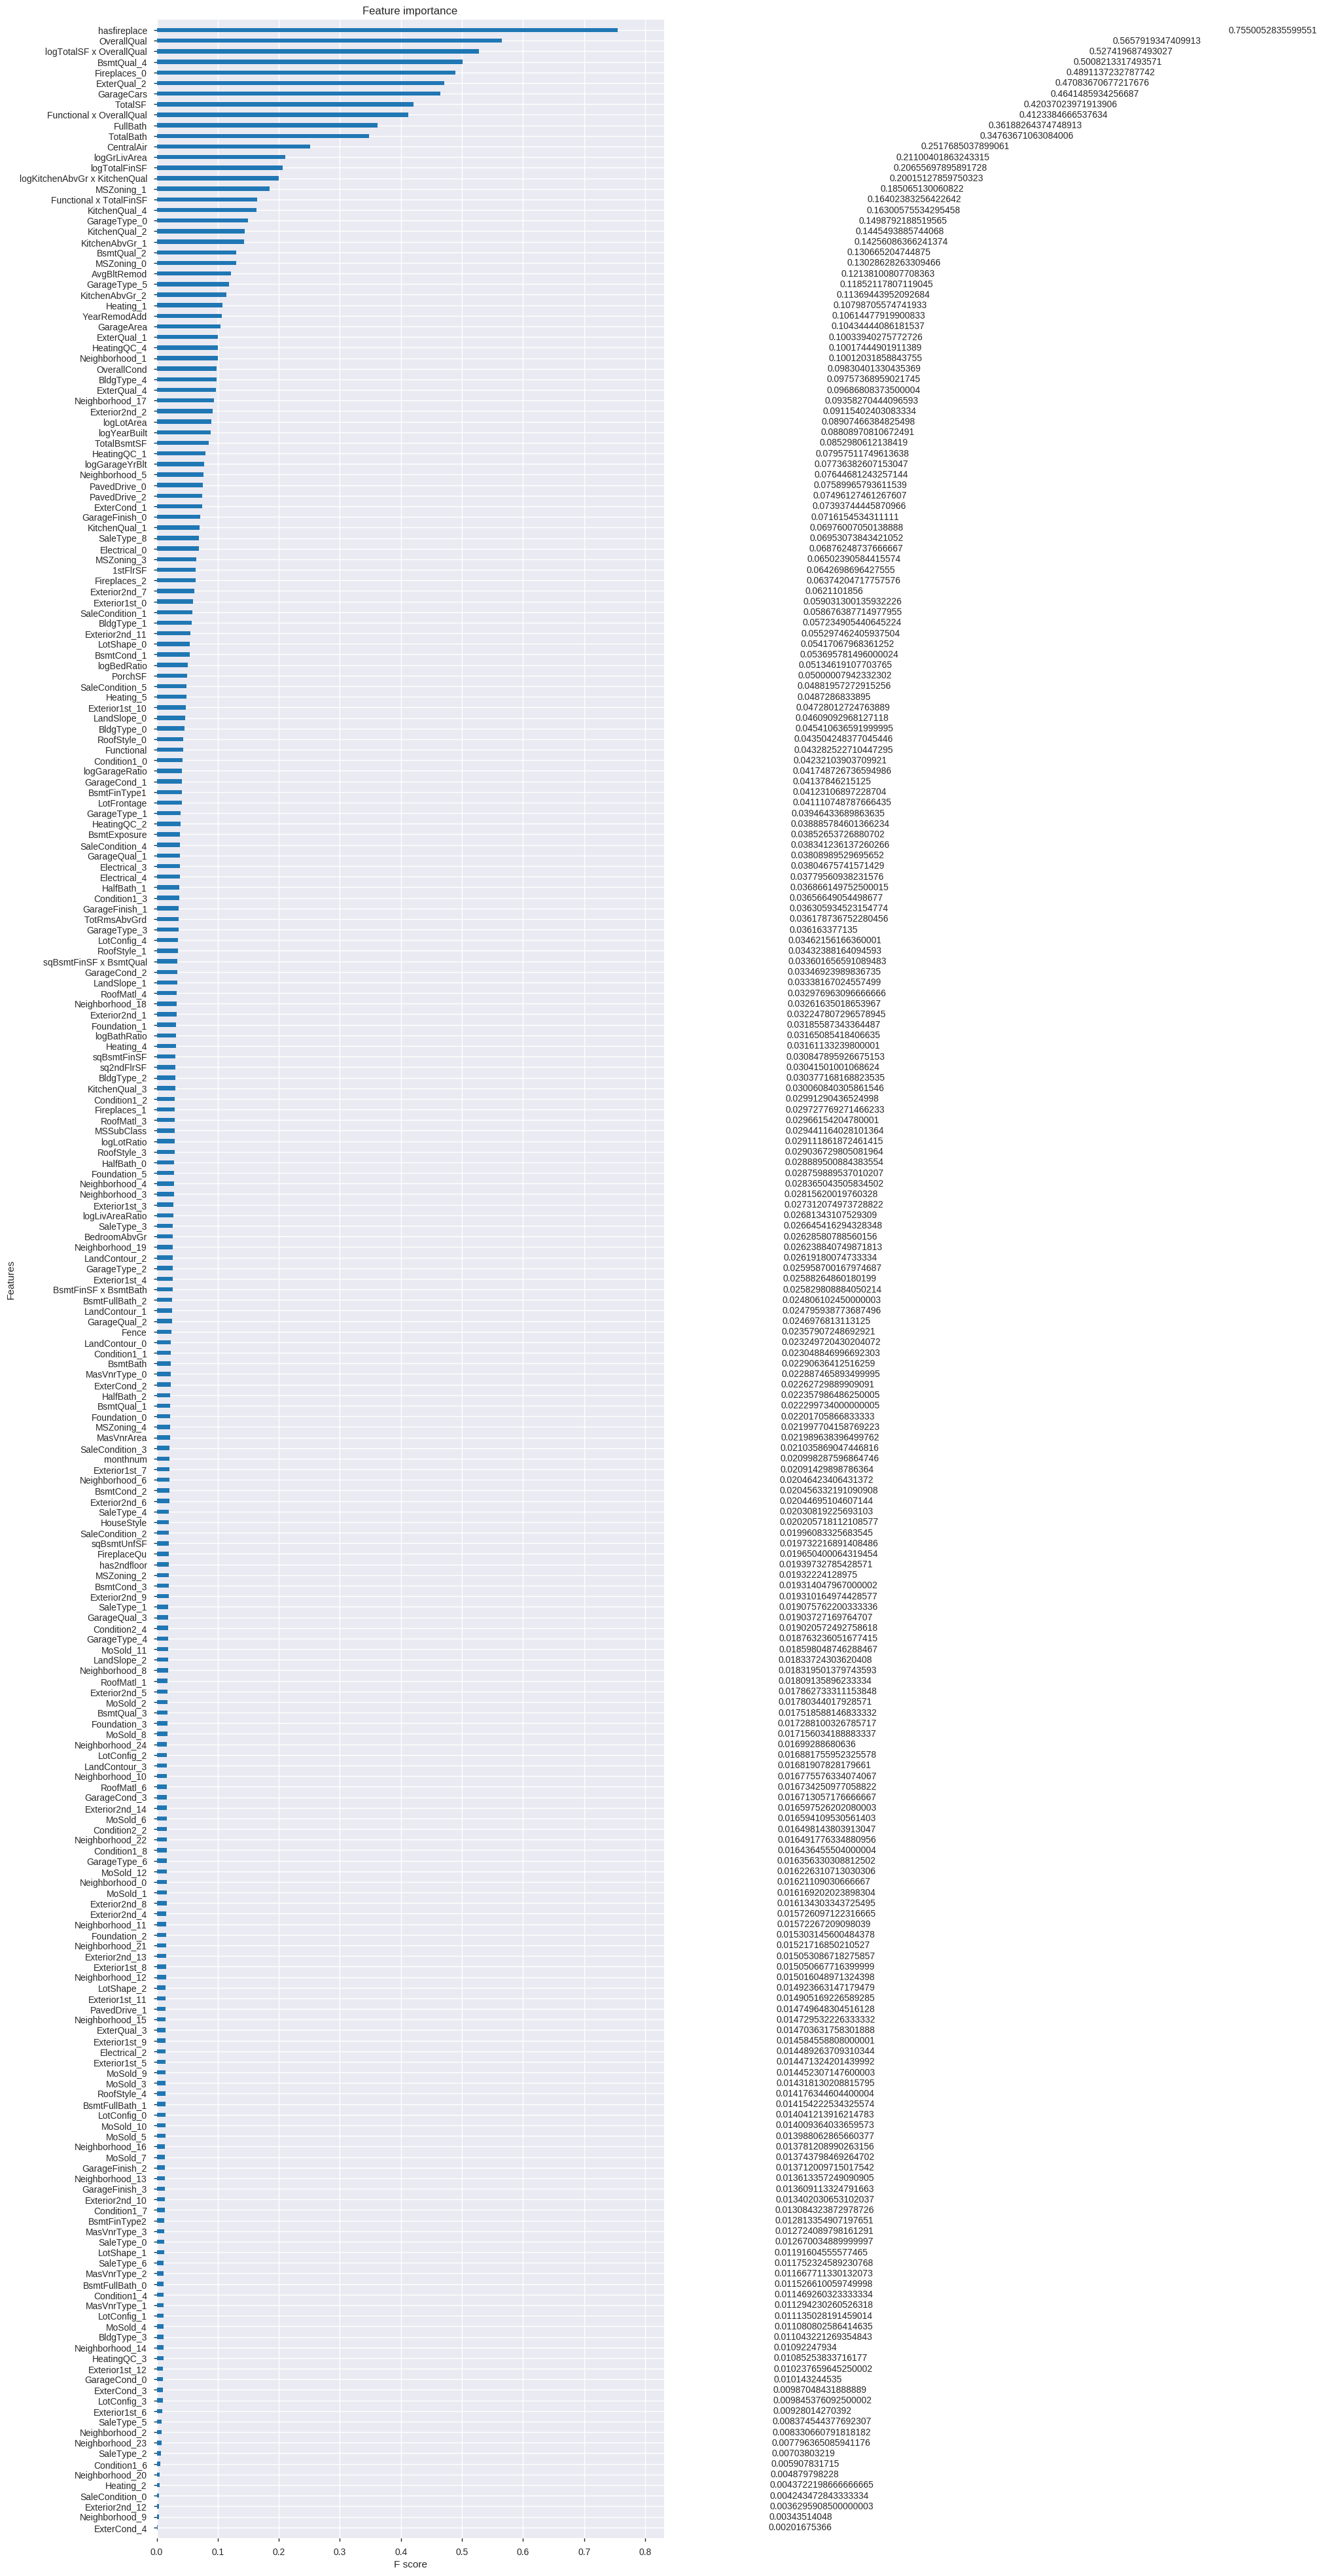

In [83]:
fig, ax = plt.subplots(figsize=(10,50))

plot_importance(xgb,max_num_features=300, height=0.4, ax=ax, importance_type='gain');

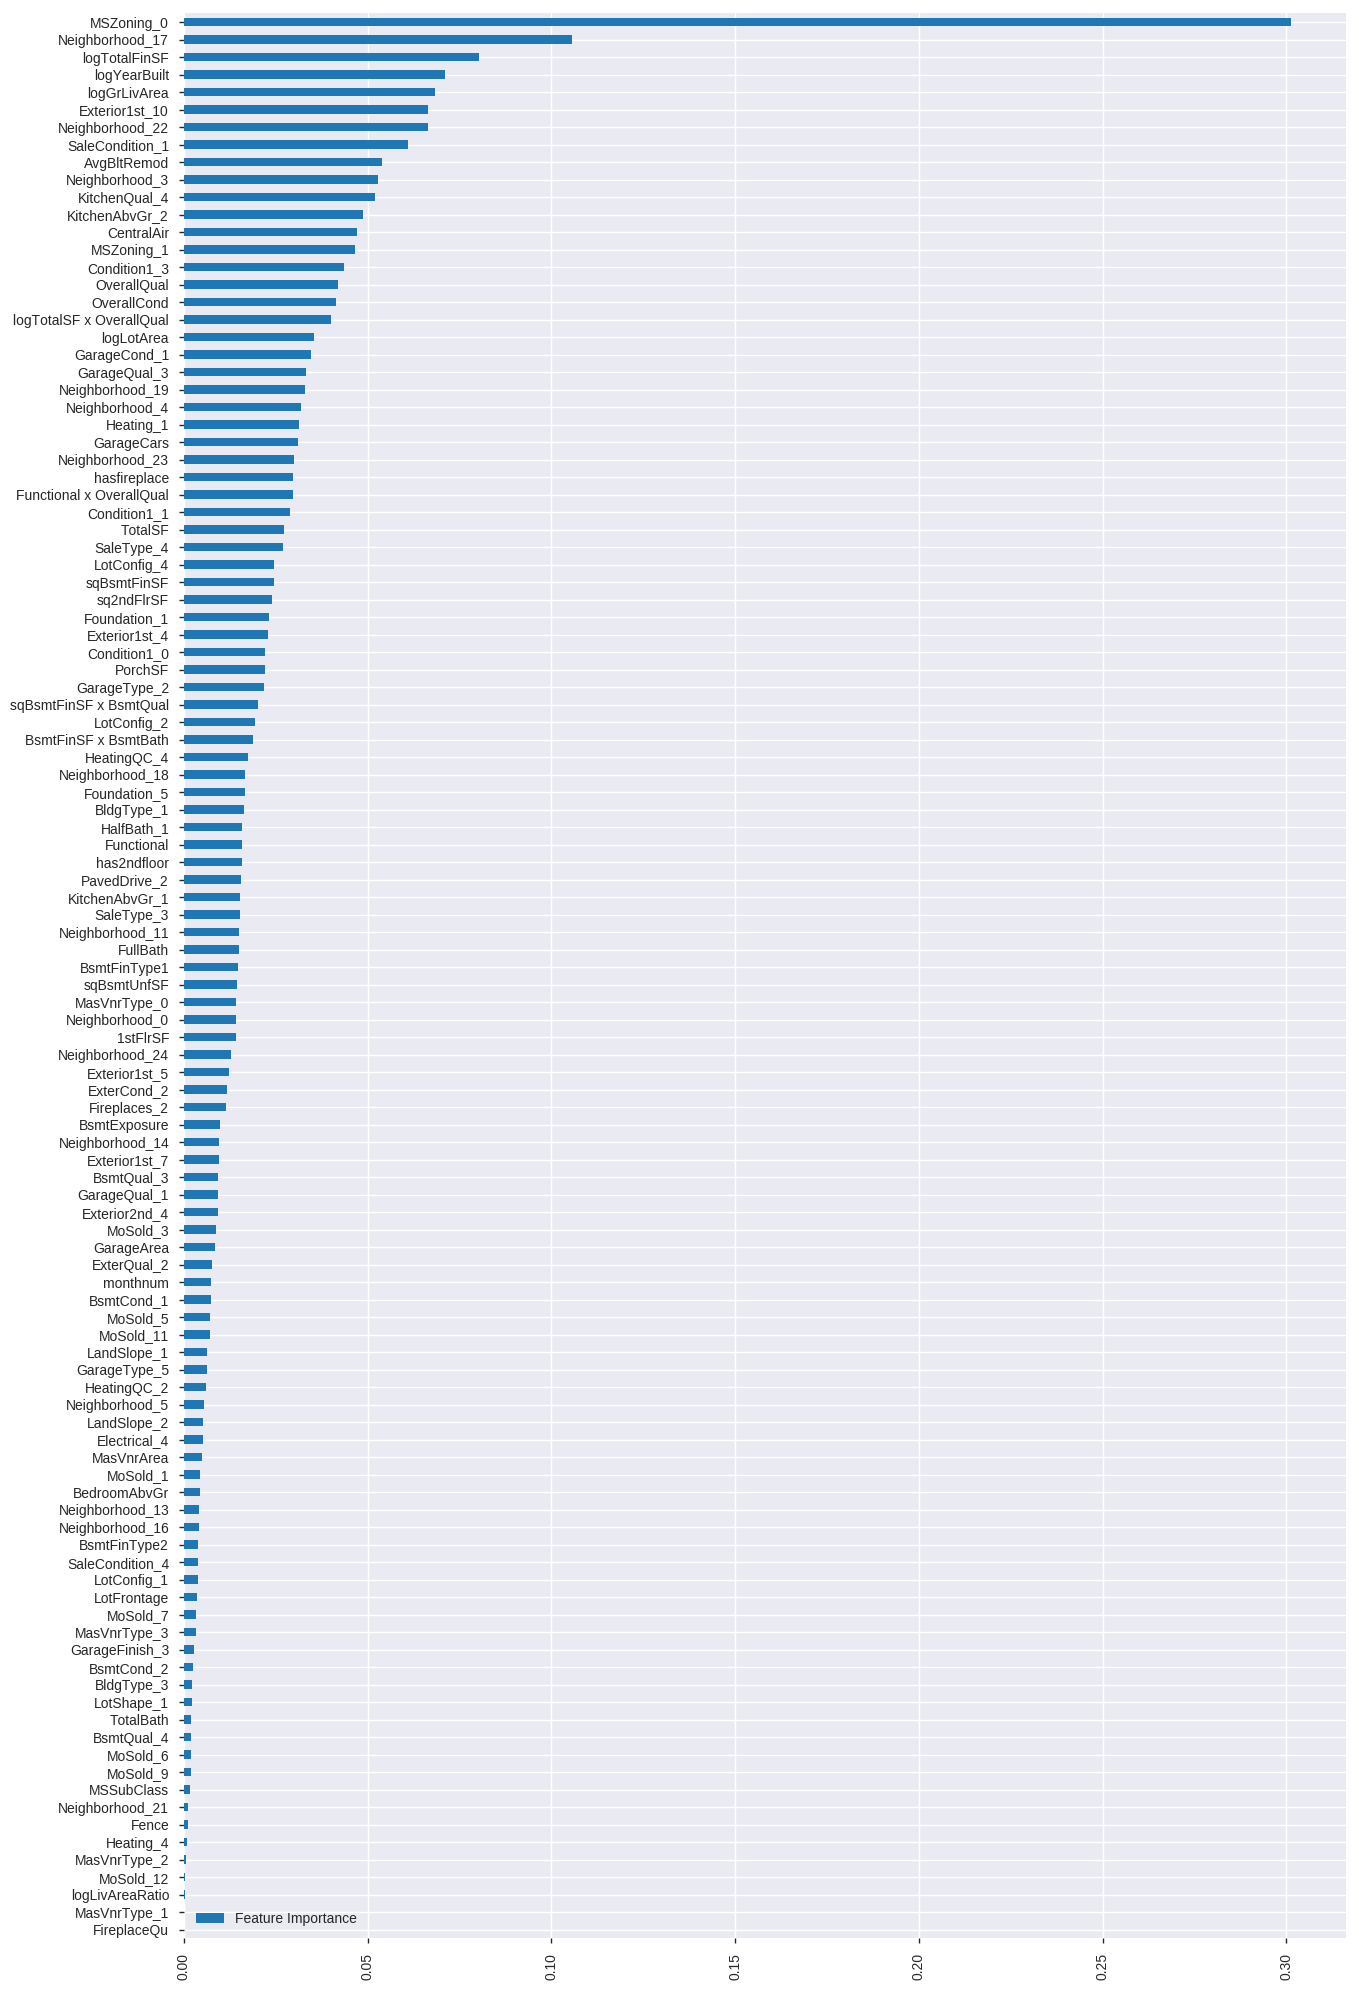

In [84]:
imp_lasso = pd.DataFrame({"Feature Importance" : lasso._final_estimator.coef_}, index=predictors)
imp_lasso["Feature Importance"]=abs(imp_lasso["Feature Importance"])
imp_lasso[imp_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

### 6. Stack and Blend

In [85]:
# stack models
# with use_features_in_secondary I think we need to scale 
stack_cv = make_pipeline(use_transform(),
                         StackingCVRegressor(regressors=[xgb, lgbm, lasso, ridge, elasticnet, 
                                                         svr, kr, gb, mlp],
                                             meta_regressor=xgb,
                                             cv=kfolds,
                                             use_features_in_secondary=True))
                         

In [86]:
%%time
print(datetime.datetime.now(), "stack xval")
xval_df['stack'] = cross_val_predict(stack_cv, df[predictors].values, df[response].values, cv=kfolds)
print(datetime.datetime.now(), "xval finished")

# compute crossval score
cvscores['stack'] = np.sqrt(mean_squared_error(xval_df['log_y'], xval_df['stack']))
print("stack crossval score %.6f" % cvscores['stack'])

print(datetime.datetime.now(), "full train")
stack_cv.fit(df[predictors].values, df[response].values)
full_train_df['stack'] = stack_cv.predict(df[predictors].values)
print(datetime.datetime.now(), "full train finished")




2019-05-21 22:06:15.186959 stack xval
2019-05-21 22:50:26.896488 xval finished
stack crossval score 0.104689
2019-05-21 22:50:26.897829 full train
2019-05-21 22:54:59.093248 full train finished
CPU times: user 4h 29min 40s, sys: 3min 8s, total: 4h 32min 48s
Wall time: 48min 43s


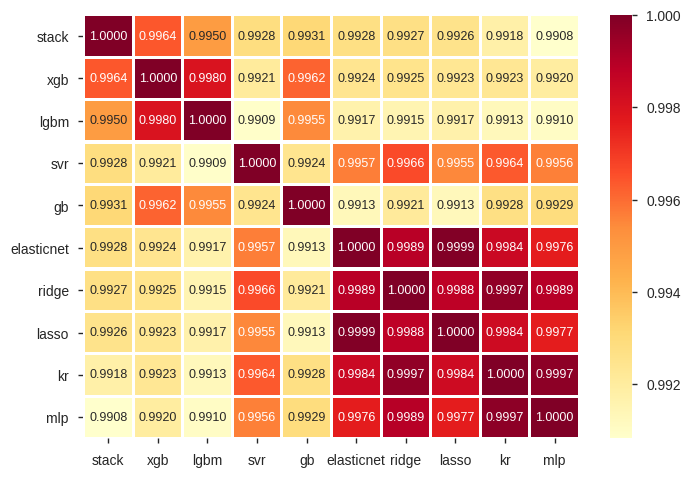

In [87]:
xval_corr = xval_df[['stack', 'xgb', 'lgbm', 'svr', 'gb', 'elasticnet', 'ridge', 'lasso', 'kr', 'mlp']].corr()
sns.heatmap(xval_corr, cmap="YlOrRd", linewidths=1.5, annot=True, annot_kws={'size': 9}, fmt='.4f')


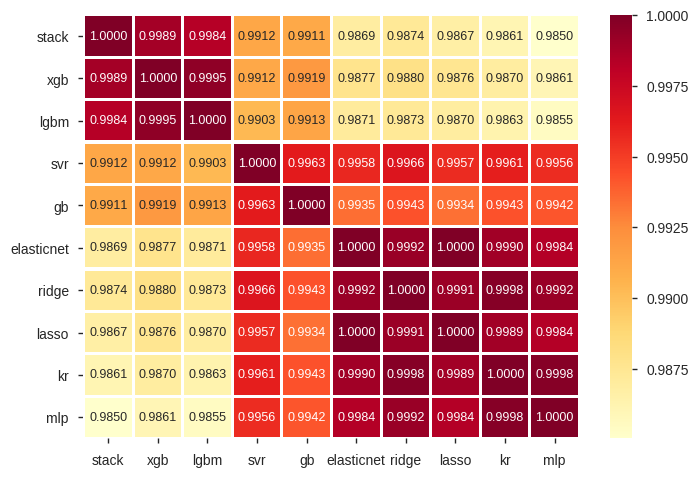

In [88]:
full_train_corr = full_train_df[['stack', 'xgb', 'lgbm', 'svr', 'gb', 'elasticnet', 'ridge', 'lasso', 'kr', 'mlp']].corr()
sns.heatmap(full_train_corr, cmap="YlOrRd", linewidths=1.5, annot=True, annot_kws={'size': 9}, fmt='.4f')


In [89]:
#%%time
# blend stacked model with individual models using a weighted average.
# weighted avg of all models, no intercept, positive coefs
# on further review, fit_intercept=False screws it up, puts all weight on 1st model, seems like a bug 

# since individual regressors are pipelines that do scaling
# and the metaregressor doesn't use features
# shouldn't need to transform

# note - this should do the same,
# will re-run all models instead of using xval_df (slower and less explicit)
# blendcv = StackingCVRegressor(regressors=blendpredictors,
#                               meta_regressor=blendlasso,
#                               cv=kfolds,
#                               use_features_in_secondary=False)
# blendcv.fit(df[predictors].values, df[response].values)

print(datetime.datetime.now())

blendlasso = LassoCV(alphas=np.logspace(-6, -4, 5),
                     max_iter=100000,
                     cv=kfolds,
                     fit_intercept=True,
                     positive=True)
                           
blendpredictors = ['stack', 'xgb', 'lgbm', 'svr', 'gb', 'elasticnet', 'ridge', 'lasso', 'kr', 'mlp']
blendlasso.fit(xval_df[blendpredictors],
               xval_df['log_y'])

xval_df['stackblend']=blendlasso.predict(xval_df[blendpredictors])
cvscores['stackblend'] = np.sqrt(mean_squared_error(xval_df['log_y'], xval_df['stackblend']))
print("stackblend crossval score %.6f" % cvscores['stackblend'])

full_train_df['stackblend']= blendlasso.predict(full_train_df[blendpredictors])
print("stackblend full train score %.6f" % np.sqrt(mean_squared_error(full_train_df['log_y'], full_train_df['stackblend'])))


2019-05-21 22:54:59.788329
stackblend crossval score 0.098289
stackblend full train score 0.074928


In [90]:
print('coefs', dict(zip(blendpredictors,
                        list(blendlasso.coef_))))
print('intercept', blendlasso.intercept_)
print('sum', np.sum(blendlasso.coef_))
print('alpha', blendlasso.alpha_ )
print('coefs adjusted to sum to 1', blendlasso.coef_/np.sum(blendlasso.coef_))


coefs {'stack': 0.05649801274133933, 'xgb': 0.0, 'lgbm': 0.01963308660487698, 'svr': 0.40935598914999605, 'gb': 0.20634604554046704, 'elasticnet': 0.0, 'ridge': 0.0, 'lasso': 0.32030713832285984, 'kr': 0.0, 'mlp': 0.0}
intercept -0.14943307204123357
sum 1.0121402723595392
alpha 0.0001
coefs adjusted to sum to 1 [0.05582034 0.         0.01939759 0.40444591 0.203871   0.
 0.         0.31646517 0.         0.        ]


In [91]:
## review final CV scores

for col in xval_df.columns:
    if col in ['true_y', 'log_y', 'true_pred', 'error_stackblend']:
        continue
        
    print(col)
    evaluate2(xval_df[col], xval_df['log_y'])
    print('CV:', cvscores.get(col))
    print()


xgb
Train RMSE (log) 0.10520172520311231
Train RMSE 19428.704366838898
Train R-squared 0.9250514713444498
Train MAE 12541.783207168743
CV: 0.10520172520311231

lgbm
Train RMSE (log) 0.1057124066069439
Train RMSE 19398.554908937564
Train R-squared 0.9256257171728612
Train MAE 12668.382854829366
CV: 0.1057124066069439

gb
Train RMSE (log) 0.10440048812199768
Train RMSE 19181.78552154316
Train R-squared 0.9266780076876171
Train MAE 12389.087883595072
CV: 0.10440048812199768

svr
Train RMSE (log) 0.10038664271888095
Train RMSE 17798.56963377027
Train R-squared 0.9390008722997762
Train MAE 11824.602139396671
CV: 0.10038664271888095

kr
Train RMSE (log) 0.1020597133931318
Train RMSE 17947.88584160433
Train R-squared 0.9383364770643146
Train MAE 12149.006924972697
CV: 0.1020597133931318

mlp
Train RMSE (log) 0.10294011595341832
Train RMSE 18141.592787456004
Train R-squared 0.936349708908538
Train MAE 12257.671884793812
CV: 0.10294011595341832

lasso
Train RMSE (log) 0.1010074798509947
Train R

In [92]:
full_train_df['error_log'] = full_train_df['stackblend'] - full_train_df['log_y']
full_train_df['true_y'] = np.expm1(full_train_df['log_y'])
full_train_df['true_pred'] = np.expm1(full_train_df['stackblend'])
full_train_df['error_stackblend'] = full_train_df['true_pred'] - full_train_df['true_y']
full_train_df.describe()

log_y         true_y          xgb         lgbm           gb  \
count  1449.000000    1449.000000  1449.000000  1449.000000  1449.000000   
mean     12.021308  179666.820566    12.021416    12.021308    12.024782   
std       0.391841   74938.007771     0.385612     0.385697     0.375738   
min      10.460271   34900.000000    10.473038    10.474711    10.778626   
25%      11.775297  130000.000000    11.780741    11.778774    11.776671   
50%      12.001512  163000.000000    11.998379    11.998622    11.997444   
75%      12.271397  213500.000000    12.260628    12.265210    12.258936   
max      13.345509  625000.000000    13.322684    13.323880    13.231686   

               svr           kr          mlp        lasso        ridge  \
count  1449.000000  1449.000000  1449.000000  1449.000000  1449.000000   
mean     12.027086    12.021170    12.021296    12.021308    12.021308   
std       0.376901     0.378012     0.376578     0.379053     0.379340   
min      10.610712    10.656523    10.655397    10.630065    10.657276   
25%      11.777637    11.765757    11.765025    11.764381    11.767999   
50%      12.002485    11.998481    11.998707    12.004446    12.000745   
75%      12.263915    12.268353    12.267111    12.270154    12.266181   
max      13.314007    13.343156    13.343768    13.312059    13.334334   

        elasticnet        stack   stackblend    error_log      true_pred  \
count  1449.000000  1449.000000  1449.000000  1449.000000    1449.000000   
mean     12.021308    12.021873    12.020930    -0.000378  179054.928402   
std       0.379202     0.386081     0.381841     0.074953   73375.805469   
min      10.631523    10.545396    10.646742    -0.379874   42054.342693   
25%      11.765898    11.782858    11.768357    -0.039695  129100.857854   
50%      12.004848    12.001265    11.996942    -0.003690  162256.788956   
75%      12.268694    12.264618    12.262274     0.030050  211561.170931   
max      13.313354    13.311962    13.308677     0.616637  602399.245428   

       error_stackblend  
count       1449.000000  
mean        -611.892164  
std        12713.391136  
min       -86818.562437  
25%        -6394.338472  
50%         -578.669095  
75%         5369.976861  
max        86586.175639

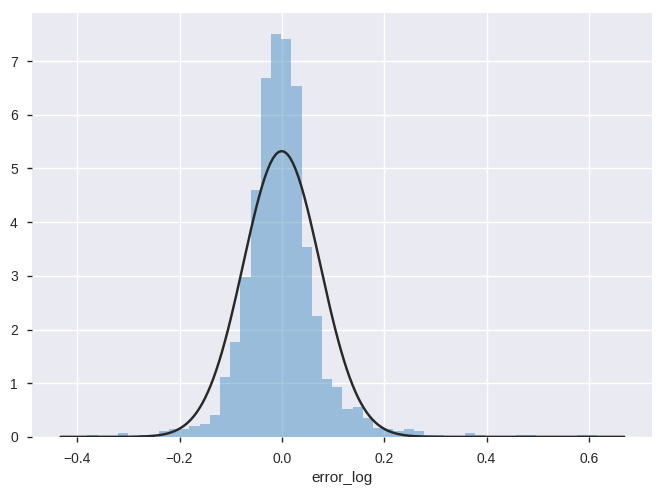

In [93]:
residual = full_train_df[['true_y','true_pred','error_stackblend', 'error_log']]
residual.reset_index(inplace=True)
residual['index'] += 1
residual.to_csv('residual_temp.csv', index=False)
sns.distplot(residual['error_log'], kde=False, fit=stats.norm)


In [94]:
full_train_df.sort_values('error_stackblend')[['true_y','true_pred','error_stackblend', 'error_log']]
full_train_df.sort_values('error_log')[['true_y','true_pred','error_stackblend', 'error_log']]


true_y      true_pred  error_stackblend  error_log
963   135000.0   92332.624507     -42667.375493  -0.379874
88     85000.0   61771.560362     -23228.439638  -0.319204
678   159434.0  115969.516090     -43464.483910  -0.318300
1115  112000.0   86250.460861     -25749.539139  -0.261241
769   395000.0  310794.579321     -84205.420679  -0.239753
487   160000.0  127455.265886     -32544.734114  -0.227407
142   166000.0  132900.213689     -33099.786311  -0.222388
328   214500.0  172791.870616     -41708.129384  -0.216221
13    279500.0  227106.068556     -52393.931444  -0.207584
1204  113000.0   91897.787100     -21102.212900  -0.206709
185   475000.0  388181.437563     -86818.562437  -0.201841
277   141000.0  115434.134283     -25565.865717  -0.200058
557   234000.0  193320.288411     -40679.711589  -0.190972
218   311500.0  258332.591650     -53167.408350  -0.187151
858   250580.0  208506.394012     -42073.605988  -0.183808
1413  274970.0  229548.810551     -45421.189449  -0.180546
107   115000.0   96278.992288     -18721.007712  -0.177680
1132  144000.0  120643.816096     -23356.183904  -0.176969
879   328900.0  275906.279359     -52993.720641  -0.175692
238   318000.0  268889.945871     -49110.054129  -0.167749
1039  556581.0  471200.144253     -85380.855747  -0.166529
706   102776.0   87560.339429     -15215.660571  -0.160222
1019  167500.0  143324.329548     -24175.670452  -0.155872
175   243000.0  209010.807772     -33989.192228  -0.150675
1171  154900.0  133436.668377     -21463.331623  -0.149152
1161  235000.0  203011.037584     -31988.962416  -0.146324
702   254000.0  219569.943656     -34430.056344  -0.145663
1174  392500.0  340755.867259     -51744.132741  -0.141370
48    113000.0   98229.556836     -14770.443164  -0.140079
190   315000.0  274304.746929     -40695.253071  -0.138332
...        ...            ...               ...        ...
965    99500.0  118034.965751      18534.965751   0.170822
431    79900.0   95341.030595      15441.030595   0.176682
1405  175900.0  210507.344746      34607.344746   0.179604
251   235000.0  281512.513119      46512.513119   0.180591
1136   80000.0   96532.439149      16532.439149   0.187850
767   107000.0  129535.169807      22535.169807   0.191122
1203  164000.0  199367.440719      35367.440719   0.195282
1015   87000.0  106342.212082      19342.212082   0.200752
663   129000.0  157682.220164      28682.220164   0.200768
655    97500.0  120280.903332      22780.903332   0.209976
308    82500.0  102408.775733      19908.775733   0.216172
66    180000.0  225552.018721      45552.018721   0.225593
478    89471.0  112434.664011      22963.664011   0.228455
723   110000.0  139549.973295      29549.973295   0.237940
705    52000.0   66048.078532      14048.078532   0.239135
1055   90000.0  114584.526579      24584.526579   0.241501
558   121500.0  155974.585873      34474.585873   0.249777
909    35311.0   45331.784715      10020.784715   0.249808
579   253293.0  331379.986190      78086.986190   0.268718
626   135000.0  176888.169117      41888.169117   0.270241
1373  112000.0  147275.887472      35275.887472   0.273807
709   130500.0  173956.505309      43456.505309   0.287430
868    66500.0   89933.744714      23433.744714   0.301867
806    55993.0   81546.980842      25553.980842   0.375947
410    60000.0   87422.119940      27422.119940   0.376399
1422   64500.0   95335.729901      30835.729901   0.390734
586   143000.0  229586.175639      86586.175639   0.473431
961    37900.0   62275.059525      24375.059525   0.496600
494    34900.0   62664.295395      27764.295395   0.585292
30     40000.0   74108.318379      34108.318379   0.616637

[1449 rows x 4 columns]

### 7. Run on test set, export CSV for submission

In [95]:
submit_df = pd.DataFrame({'xgb' : xgb.predict(df_test[predictors]),
                          'lgbm' : lgbm.predict(df_test[predictors]),
                          'lasso' : lasso.predict(df_test[predictors]),
                          'ridge' : ridge.predict(df_test[predictors]),
                          'elasticnet' : elasticnet.predict(df_test[predictors]),
                          'svr' : svr.predict(df_test[predictors]),
                          'kr' : kr.predict(df_test[predictors]),
                          'gb' : gb.predict(df_test[predictors]),
                          'mlp' : mlp.predict(df_test[predictors]),
                          'stack' : stack_cv.predict(df_test[predictors].values),
                         })

submit_df['stackblend'] = blendlasso.predict(submit_df[blendpredictors])

submit_df['stackblend2'] = \
     0.03554723 * submit_df['stack'] + \
     0.0        * submit_df['xgb'] + \
     0.03076029 * submit_df['lgbm'] + \
     0.40982019 * submit_df['svr'] +\
     0.20487469 * submit_df['gb'] + \
     0.0        * submit_df['elasticnet'] + \
     0.0        * submit_df['ridge'] + \
     0.31899761 * submit_df['lasso'] + \
     0.         * submit_df['kr'] + \
     0.         * submit_df['mlp'] 

# alternate rounded weights

submit_df['stackblend3'] = \
     0.15       * submit_df['stack'] + \
     0.05       * submit_df['xgb'] + \
     0.05       * submit_df['lgbm'] + \
     0.15       * submit_df['svr'] +\
     0.15       * submit_df['gb'] + \
     0.25       * submit_df['elasticnet'] + \
     0.05       * submit_df['ridge'] + \
     0.05       * submit_df['lasso'] + \
     0.05       * submit_df['kr'] + \
     0.05       * submit_df['mlp'] 

submit_df


xgb       lgbm      lasso      ridge  elasticnet        svr  \
0     11.744223  11.742329  11.670229  11.655144   11.670430  11.701159   
1     11.990211  11.991682  11.970694  11.969044   11.969962  11.994577   
2     12.121154  12.127986  12.109492  12.102355   12.109018  12.130368   
3     12.214061  12.204221  12.200429  12.184548   12.198701  12.196985   
4     12.117035  12.155158  12.097693  12.089587   12.097560  12.085152   
5     12.072639  12.064523  12.051873  12.051574   12.052090  12.060768   
6     12.084150  12.074322  12.102327  12.087310   12.100708  12.103846   
7     12.014362  12.004756  11.988082  11.985689   11.987928  11.999926   
8     12.142822  12.142133  12.140058  12.146412   12.140320  12.119125   
9     11.751551  11.757982  11.678603  11.679544   11.680641  11.742022   
10    12.205961  12.184281  12.174633  12.165281   12.173541  12.136859   
11    11.472367  11.463555  11.504241  11.497568   11.502787  11.482525   
12    11.499815  11.495279  11.466649  11.470042   11.466856  11.476861   
13    11.945653  11.914915  11.865478  11.867010   11.864630  11.882849   
14    11.629268  11.689324  11.551027  11.558185   11.548839  11.576191   
15    12.806711  12.801414  12.757505  12.748557   12.756839  12.759367   
16    12.446236  12.460376  12.407965  12.415669   12.408752  12.429221   
17    12.527018  12.559508  12.519888  12.549298   12.521495  12.561684   
18    12.543905  12.531866  12.547524  12.554566   12.548707  12.591752   
19    13.137068  13.124783  13.104371  13.132269   13.105700  13.043795   
20    12.673773  12.706035  12.630221  12.637135   12.630445  12.658367   
21    12.246712  12.247450  12.230412  12.244368   12.231642  12.254905   
22    12.049931  12.049555  12.099973  12.092039   12.099360  12.096471   
23    12.021267  12.035162  11.983162  11.985112   11.983040  11.998760   
24    12.140314  12.122144  12.117717  12.110707   12.116221  12.082813   
25    12.221317  12.205488  12.185802  12.179797   12.184272  12.176438   
26    12.689325  12.682257  12.658125  12.664251   12.659396  12.677319   
27    12.386238  12.385436  12.374578  12.370456   12.373654  12.376837   
28    12.249052  12.223381  12.178815  12.175650   12.178907  12.198415   
29    12.371335  12.328734  12.443908  12.452044   12.445642  12.445709   
...         ...        ...        ...        ...         ...        ...   
1429  11.199519  11.252729  11.269618  11.251807   11.270056  11.278316   
1430  11.838907  11.820288  11.856583  11.844049   11.858264  11.877991   
1431  10.618111  10.513992  10.648909  10.744577   10.648931  10.936475   
1432  11.215320  11.105788  11.129958  11.223641   11.129471  11.360223   
1433  10.799999  10.712967  10.923919  11.018591   10.924185  11.089280   
1434  12.718435  12.718465  12.784507  12.828319   12.789712  12.880491   
1435  12.551713  12.547444  12.607922  12.636808   12.612304  12.618553   
1436  12.205042  12.212102  12.262676  12.264600   12.262376  12.262668   
1437  11.894097  11.920786  11.944043  11.912422   11.942477  11.848617   
1438  12.270366  12.267411  12.218102  12.229346   12.217911  12.204291   
1439  12.021342  11.993698  12.000577  12.006004   12.000350  12.025708   
1440  12.211283  12.221917  12.247305  12.219040   12.247106  12.271790   
1441  12.147230  12.132114  12.182436  12.162824   12.181338  12.211063   
1442  12.717464  12.708992  12.715336  12.716360   12.715047  12.725230   
1443  12.767679  12.792150  12.731708  12.701887   12.728911  12.697123   
1444  11.359905  11.380505  11.416889  11.416268   11.417796  11.474687   
1445  12.239198  12.239255  12.151824  12.169368   12.151320  12.257416   
1446  11.591196  11.570523  11.631006  11.634636   11.627946  11.599266   
1447  11.794917  11.779920  11.764981  11.765528   11.764387  11.765281   
1448  11.879062  11.886281  11.937059  11.908877   11.935401  11.853262   
1449  11.275790  11.297460  11.279174  11.263170   11.277116  11.263200   
1450  11.242099  11.259605  11.324040

In [96]:
submit_df['xgb'] = np.expm1(submit_df['xgb'])
submit_df['lgbm'] = np.expm1(submit_df['lgbm'])
submit_df['lasso'] = np.expm1(submit_df['lasso'])
submit_df['ridge'] = np.expm1(submit_df['ridge'])
submit_df['elasticnet'] = np.expm1(submit_df['elasticnet'])
submit_df['svr'] = np.expm1(submit_df['svr'])
submit_df['kr'] = np.expm1(submit_df['kr'])
submit_df['gb'] = np.expm1(submit_df['gb'])
submit_df['mlp'] = np.expm1(submit_df['mlp'])

submit_df['stack'] = np.expm1(submit_df['stack'])
submit_df['stackblend'] = np.expm1(submit_df['stackblend'])
submit_df['stackblend2'] = np.expm1(submit_df['stackblend2'])
submit_df['stackblend3'] = np.expm1(submit_df['stackblend3'])

submit_df.head()


xgb           lgbm          lasso          ridge     elasticnet  \
0  126022.367188  125783.951466  117034.065647  115281.845447  117057.565340   
1  161168.437500  161405.610513  158053.270121  157792.698805  157937.602398   
2  183716.375000  184975.941899  181586.315924  180294.921158  181500.362681   
3  201603.031250  199628.962237  198873.430888  195740.105682  198530.149186   
4  182961.218750  190070.938051  179456.338348  178007.573375  179432.559777   

             svr             kr             gb            mlp          stack  \
0  120710.567689  114860.894532  126305.329914  115364.301295  125452.304688   
1  161873.606697  158863.724650  159914.439239  159806.910938  159229.843750   
2  185417.023429  180056.985276  185087.733564  180006.011248  180541.531250   
3  198189.723463  195879.763801  196232.046003  195567.538660  199488.125000   
4  177219.777396  176884.756557  186551.573183  176379.129940  183050.921875   

      stackblend    stackblend2    stackblend3  
0  120114.384944  120958.463625  120771.995569  
1  159469.102512  160136.718760  159485.087789  
2  183430.249510  183931.505175  182551.927783  
3  197834.754328  198094.542974  198077.439537  
4  179914.948655  180405.883568  181029.039668

In [97]:
submit_df.describe()


xgb           lgbm         lasso         ridge    elasticnet  \
count    1459.000000    1459.000000  1.459000e+03  1.459000e+03  1.459000e+03   
mean   178461.296875  178376.608660  1.798412e+05  1.798245e+05  1.798325e+05   
std     77442.820312   77423.636156  9.087043e+04  8.998370e+04  9.055761e+04   
min     40867.328125   36826.209211  4.214557e+04  4.637685e+04  4.214652e+04   
25%    128073.757812  128422.401158  1.265113e+05  1.261409e+05  1.264909e+05   
50%    157042.812500  157912.414849  1.585167e+05  1.577078e+05  1.585996e+05   
75%    211617.718750  209625.760510  2.113404e+05  2.118663e+05  2.113092e+05   
max    646452.937500  666337.924753  1.975585e+06  1.853865e+06  1.947650e+06   

                 svr            kr             gb           mlp  \
count    1459.000000  1.459000e+03    1459.000000  1.459000e+03   
mean   179694.650294  1.798012e+05  178923.603653  1.798449e+05   
std     77668.010559  9.120627e+04   77146.583661  9.290331e+04   
min     50915.760949  4.923706e+04   51107.996502  5.112798e+04   
25%    128565.499015  1.260625e+05  128763.051970  1.260348e+05   
50%    158916.232686  1.579397e+05  157057.512630  1.581566e+05   
75%    210424.450781  2.110911e+05  210364.953981  2.108054e+05   
max    569898.150988  1.969804e+06  634163.006349  2.111921e+06   

               stack     stackblend    stackblend2    stackblend3  
count    1459.000000    1459.000000    1459.000000    1459.000000  
mean   178516.796875  178946.437694  179230.390754  179080.637030  
std     77717.562500   78747.690965   77792.223534   79213.520123  
min     43728.726562   48524.566076   49348.901202   46964.258971  
25%    128765.285156  126991.649909  127763.394692  127634.062261  
50%    156997.296875  157374.484089  158075.135579  157633.284965  
75%    211004.421875  210765.909127  210822.288866  211555.553143  
max    547078.250000  567107.761356  561387.430868  861655.636912

In [98]:
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['xgb']}).to_csv('xgb.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['lgbm']}).to_csv('lgbm.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['lasso']}).to_csv('lasso.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['ridge']}).to_csv('ridge.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['elasticnet']}).to_csv('elasticnet.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['svr']}).to_csv('svr.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['kr']}).to_csv('kr.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['gb']}).to_csv('gb.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['mlp']}).to_csv('mlp.csv', index=False)

pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['stack']}).to_csv('stack.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['stackblend']}).to_csv('stackblend.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['stackblend2']}).to_csv('stackblend2.csv', index=False)
pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': submit_df['stackblend3']}).to_csv('stackblend3.csv', index=False)
                                                                                      